# Predicting the price of cars using machine learning models

<div style="text-align: right"> Aditya Asok Nair </div>
<div style="text-align: right"> 534002475 </div>
<div style="text-align: right"> aditya12765@tamu.edu </div>

## Introduction:
The automotive sector, which is dynamic and subject to frequent market swings, has a persistent problem forecasting car sales statistics with any degree of accuracy. For manufacturers, dealerships, and other stakeholders to make well-informed decisions, optimise production, manage inventories, and effectively plan marketing campaigns, they must be able to estimate future sales.Delving into a comprehensive dataset allows us to uncover valuable insights that drive informed decision-making and strategy developmentscape as a whole. 

### Metadata

Data includes:
- Vehicle Details: Includes specific information about each vehicle, such as its make, model, trim, and manufacturing year.
- Transaction Information: Provides insights into the sales transactions, including selling prices and sale dates.
- Market Trends: MMR values offer an estimate of the market value of each vehicle, allowing for analysis of market trends and fluctuations.
- Condition and Mileage: Contains data on the condition of the vehicles as well as their odometer readings, enabling analysis of how these factors influence selling prices.

## Significance of the Project:
- Market Insight: By analyzing this dataset, we can gain deep insights into the factors influencing car pricing and demand, thus empowering stakeholders to make data-driven decisions.

- Consumer Empowerment: Understanding market trends enables consumers to make informed choices, ensuring they get the best value for their investment.

## Outline:

- Initial Exploration:
  - Examine basic information about the dataset, such as the number of rows and columns, data types, and any missing values.
- Data Cleaning:
  - Preprocess the dataset to handle missing values, remove duplicates, and ensure consistency in data formats.
- Statistical Analysis and Visualization:
  - Perform descriptive statistics on numeric columns to gain insights into central tendency, dispersion, and distribution.
Utilize visualizations, including histograms, box plots, and scatter plots, to explore relationships between different columns and identify patterns or outliers.
- Asking Questions and Drawing Insights:
  - Formulate relevant questions based on the observed relationships and patterns.
Extract insights from the dataset to answer these questions, using both quantitative analysis and visualizations.
- Different types of model for predicting selling price of car
- Conclusion and Next Steps:
  - Summarize the key findings and conclusions for different type of models.

### Importing required libraries

In [1]:
from IPython.display import display
import warnings
warnings.filterwarnings("ignore")

import datetime
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_absolute_percentage_error as mape
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score as r2
from sklearn.feature_selection import f_regression, f_classif, mutual_info_regression
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import KernelDensity
from sklearn.cluster import estimate_bandwidth
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor as rfr
from sklearn.ensemble import GradientBoostingRegressor as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor as knnr

In [2]:
#cp = pd.read_excel('car_prices.xlsx', parse_dates = True)
cp = pd.read_csv('car_prices.csv', parse_dates = True)  # Loading the dataset

## Initial exploration

In [3]:
cp.columns

Index(['year', 'make', 'model', 'trim', 'body', 'transmission', 'vin', 'state',
       'condition', 'odometer', 'color', 'interior', 'seller', 'mmr',
       'sellingprice', 'saledate'],
      dtype='object')

### Metadata

Data includes:
- Vehicle Details: Includes specific information about each vehicle, such as its make, model, trim, and manufacturing year.
- Transaction Information: Provides insights into the sales transactions, including selling prices and sale dates.
- Market Trends: MMR values offer an estimate of the market value of each vehicle, allowing for analysis of market trends and fluctuations.
- Condition and Mileage: Contains data on the condition of the vehicles as well as their odometer readings, enabling analysis of how these factors influence selling prices.

In [4]:
cp.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)


In [5]:
cp.shape

(558836, 16)

In [6]:
cp.isnull().sum()

year                0
make            10301
model           10399
trim            10651
body            13195
transmission    65352
vin                 4
state               0
condition       11819
odometer           94
color             749
interior          749
seller              0
mmr                37
sellingprice       12
saledate           12
dtype: int64

In [7]:
cp.duplicated().sum()

0

In [8]:
cp.dtypes

year              int64
make             object
model            object
trim             object
body             object
transmission     object
vin              object
state            object
condition       float64
odometer        float64
color            object
interior         object
seller           object
mmr             float64
sellingprice    float64
saledate         object
dtype: object

We can see that most of the data is categorical. This presents us with a couple options for moving forward, all of which we will be using:
- Encode the object data into numeric data and run this new data through the regular prediction models
- Run the unencoded data through models suited to working with categorical data

### Data Transformation

In [9]:
cp.transmission.unique()

array(['automatic', nan, 'manual', 'Sedan', 'sedan'], dtype=object)

`transmission` column is having 'sedan' and 'Sedan' as it's unique values which shouldn't actually be because according to the data provided `transmission` refers to the type of transmission in the car (e.g., automatic).

In [10]:
wrong_1=cp[cp.transmission=='sedan']
wrong_2=cp[cp.transmission=='Sedan']
wrong_1.head(3)

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
492483,2015,Volkswagen,Jetta,SE PZEV w/Connectivity,Navitgation,sedan,automatic,3vwd17aj5fm206111,NaN,2.0,6864,gray,black,NaN,14000.0,"October 30, 1926"
497007,2015,Volkswagen,Jetta,SE PZEV w/Connectivity,Navitgation,sedan,automatic,3vwd17aj5fm273601,NaN,28.0,339,black,black,NaN,14300.0,"April 26, 1935"
497010,2015,Volkswagen,Jetta,SE PZEV w/Connectivity,Navitgation,sedan,automatic,3vwd17aj5fm221322,NaN,48.0,18384,silver,black,NaN,13550.0,"December 16, 1936"


We can clearly see that on all those rows which have 'sedan' and 'Sedan' as their `transmission` column, these rows have mismatched values for all their columns starting from body column.

In [11]:
wrong_df=pd.concat([wrong_1,wrong_2],axis=0).copy()

In [12]:
for i in range(4,len(wrong_df.columns)-1):
    wrong_df[wrong_df.columns[i]]=wrong_df[wrong_df.columns[i+1]]
wrong_df.saledate=None
wrong_df.head(5)
modified_indices=wrong_df.index
modified_indices
cp.loc[modified_indices]=wrong_df;
display(cp.transmission.unique())

array(['automatic', nan, 'manual'], dtype=object)

#### Extracting month and year from saledate column

In [13]:
cp['saledate']

0         Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1         Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2         Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3         Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4         Thu Dec 18 2014 12:30:00 GMT-0800 (PST)
                           ...                   
558831    Thu Jul 09 2015 07:00:00 GMT-0700 (PDT)
558832    Wed Jul 08 2015 09:30:00 GMT-0700 (PDT)
558833    Wed Jul 08 2015 09:30:00 GMT-0700 (PDT)
558834    Thu Jul 09 2015 06:45:00 GMT-0700 (PDT)
558835    Thu May 28 2015 05:30:00 GMT-0700 (PDT)
Name: saledate, Length: 558836, dtype: object

We can see that the saledate column contains a lot of data. However, information regarding the time and day will not really help us in predicting the selling price of a car. As such we will be extracting the month and year of sale from this column, after which we will drop the column.

In [14]:
cp['saledate']= pd.to_datetime(cp['saledate'], utc=True)

In [15]:
cp['saleyear'] = pd.DatetimeIndex(cp['saledate']).year
cp['salemonth'] = pd.DatetimeIndex(cp['saledate']).month

In [16]:
cp = cp.drop('saledate', axis=1)

In [17]:
cp.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saleyear,salemonth
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,2014.0,12.0
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,2014.0,12.0
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,2015.0,1.0
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,2015.0,1.0
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,2014.0,12.0


Relevant data has been extracted

In [18]:
cp[['year','make','model','salemonth' ,'saleyear']]

,year,make,model,salemonth,saleyear
0,2015,Kia,Sorento,12.0,2014.0
1,2015,Kia,Sorento,12.0,2014.0
2,2014,BMW,3 Series,1.0,2015.0
3,2015,Volvo,S60,1.0,2015.0
4,2014,BMW,6 Series Gran Coupe,12.0,2014.0
...,...,...,...,...,...
558831,2015,Kia,K900,7.0,2015.0
558832,2012,Ram,2500,7.0,2015.0
558833,2012,BMW,X5,7.0,2015.0
558834,2015,Nissan,Altima,7.0,2015.0


We can see from the table above that there are records in which cars have been sold in years before their actual manufacture. This implies that this table not only contain the sales of cars, but also reservations made on cars yet to be released. This could skew the sales cost higher than it would normally be, as our model is intended to be used by people who wannt to predict what price their car would sell for. Let us see if the reserved entries skew the data or if the entries exclude any reservation cost.

In [19]:
cp_bought = cp[cp['year'] < cp['saleyear']]
display(cp_bought.shape)
display(cp_bought['sellingprice'].mean())

(544229, 17)

13332.954111228913

In [20]:
cp_reserved = cp[cp['year'] > cp['saleyear']]
display(cp_reserved.shape)
display(cp_reserved['sellingprice'].mean())

(201, 17)

25396.766169154227

In [21]:
display(cp_reserved['sellingprice'].mean() - cp_bought['sellingprice'].mean())

del cp_bought
del cp_reserved

12063.812057925314

We can see that there is quite a bump in the average selling price, from which we can infer that the reservation cost is included in the associated selling price. As such we will be dropping these rows. There is the possibility that this inference is not true, as there are only 226 values and the selling price may be higher for those particular cars; but as the size of the selection is so small we can drop it without too much concern

In [22]:
cp = cp[cp['year'] < cp['saleyear']]
display(cp.shape)
display(cp.head())

(544229, 17)

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saleyear,salemonth
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,2015.0,1.0
9,2014,Chevrolet,Camaro,LT,Convertible,automatic,2g1fb3d37e9218789,ca,3.0,4809.0,red,black,d/m auto sales inc,26300.0,17500.0,2015.0,1.0
21,2014,BMW,5 Series,528i,Sedan,automatic,wba5a5c51ed501631,ca,29.0,25969.0,black,black,financial services remarketing (lease),34200.0,30000.0,2015.0,2.0
24,2014,BMW,6 Series,650i,Convertible,automatic,wbayp9c57ed169262,ca,38.0,10736.0,black,black,the hertz corporation,67000.0,65000.0,2015.0,1.0
31,2014,Audi,SQ5,3.0T Premium Plus quattro,SUV,automatic,wa1cgafp4ea030312,ca,42.0,9606.0,white,black,audi of downtown l a,48600.0,47500.0,2015.0,1.0


#### Let us take a closer look at the vin column

In [23]:
display(cp.shape)
display(cp['vin'].nunique())

(544229, 17)

535867

In [24]:
cp['vin']

2         wba3c1c51ek116351
9         2g1fb3d37e9218789
21        wba5a5c51ed501631
24        wbayp9c57ed169262
31        wa1cgafp4ea030312
                ...        
558829    3n1ab6ap3cl622485
558830    wbafr1c53bc744672
558832    3c6td5et6cg112407
558833    5uxzw0c58cl668465
558835    1ftfw1et2eke87277
Name: vin, Length: 544229, dtype: object

The vin column seems to contain a unique identification number for each car. There do seem to be a few duplicates, which may be due to the seller buying cars to flip them later on for a hopefully higher price. This data does not really help us with prediction, so we will be dropping it.

In [25]:
cp = cp.drop('vin', axis = 1)

In [26]:
cp.head()

,year,make,model,trim,body,transmission,state,condition,odometer,color,interior,seller,mmr,sellingprice,saleyear,salemonth
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,2015.0,1.0
9,2014,Chevrolet,Camaro,LT,Convertible,automatic,ca,3.0,4809.0,red,black,d/m auto sales inc,26300.0,17500.0,2015.0,1.0
21,2014,BMW,5 Series,528i,Sedan,automatic,ca,29.0,25969.0,black,black,financial services remarketing (lease),34200.0,30000.0,2015.0,2.0
24,2014,BMW,6 Series,650i,Convertible,automatic,ca,38.0,10736.0,black,black,the hertz corporation,67000.0,65000.0,2015.0,1.0
31,2014,Audi,SQ5,3.0T Premium Plus quattro,SUV,automatic,ca,42.0,9606.0,white,black,audi of downtown l a,48600.0,47500.0,2015.0,1.0


### Lets check for redundant/repeat entries

In [27]:
cp.nunique()

year                33
make                96
model              955
trim              1912
body                84
transmission         2
state               38
condition           41
odometer        171471
color               20
interior            17
seller           14187
mmr               1099
sellingprice      1839
saleyear             2
salemonth            8
dtype: int64

In [28]:
cp.columns

Index(['year', 'make', 'model', 'trim', 'body', 'transmission', 'state',
       'condition', 'odometer', 'color', 'interior', 'seller', 'mmr',
       'sellingprice', 'saleyear', 'salemonth'],
      dtype='object')

#### Make

In [29]:
cp['make'].unique()

array(['BMW', 'Chevrolet', 'Audi', 'Buick', 'Cadillac', 'Infiniti',
       'Hyundai', 'Jeep', 'Kia', 'Nissan', 'Mercedes-Benz', 'Lexus',
       'Mitsubishi', 'Mazda', 'MINI', 'Land Rover', 'Lincoln', 'lincoln',
       'Jaguar', 'Volkswagen', 'Toyota', 'Volvo', 'Subaru', 'Scion',
       'Porsche', nan, 'bmw', 'Acura', 'Dodge', 'Ford', 'FIAT',
       'Chrysler', 'ford', 'Ferrari', 'Honda', 'GMC', 'mitsubishi', 'Ram',
       'smart', 'chevrolet', 'Bentley', 'chrysler', 'pontiac', 'Pontiac',
       'Saturn', 'Maserati', 'Mercury', 'HUMMER', 'landrover', 'cadillac',
       'land rover', 'mercedes', 'mazda', 'toyota', 'lexus', 'gmc truck',
       'honda', 'nissan', 'porsche', 'Saab', 'Suzuki', 'dodge', 'subaru',
       'Oldsmobile', 'oldsmobile', 'hyundai', 'jeep', 'Isuzu', 'dodge tk',
       'Geo', 'acura', 'volkswagen', 'suzuki', 'kia', 'audi',
       'Rolls-Royce', 'gmc', 'maserati', 'mazda tk', 'mercury', 'buick',
       'hyundai tk', 'mercedes-b', 'vw', 'Daewoo', 'chev truck',
       'f

In [30]:
replace_dict = {'lincoln': 'Lincoln', 
                'mitsubishi': 'Mitsubishi', 
                'ford' : 'Ford',
                'ford tk' : 'Ford Truck',
                'ford truck' : 'Ford Truck',
                'chevrolet' : 'Chevrolet',
                'chev truck' : 'Chevrolet Truck',
                'audi' : 'Audi',
                'buick' : 'Buick',
                'gmc' : 'GMC',
                'jeep' : 'Jeep',
                'hyundai' : 'Hyundai',
                'toyota' : 'Toyota',
                'bmw' : 'BMW',
                'pontiac' : 'Pontiac',
                'toyota' : 'Toyota',
                'subaru' : 'Subaru',
                'chrysler' : 'Chrysler',
                'plymouth' : 'Plymouth',
                'landrover' : 'Land Rover',
                'land rover' : 'Land Rover',
                'mercedes-b' : 'Mercedes-Benz',
                'mazda' : 'Mazda',
                'dodge' : 'Dodge',
                'acura' : 'Acura',
                'oldsmobile' : 'Oldsmobile',
                'volkswagen' : 'Volkswagen',
                'nissan' : 'Nissan',
                'porsche' : 'Porsche',
                'kia' : 'Kia',
                'mercury' : 'Mercury',
                'lexus' : 'Lexus',
                'maserati' : 'Maserati',
                'cadillac' : 'Cadillac'}

cp['make'] = cp['make'].replace(replace_dict)

In [31]:
cp['make'].unique()

array(['BMW', 'Chevrolet', 'Audi', 'Buick', 'Cadillac', 'Infiniti',
       'Hyundai', 'Jeep', 'Kia', 'Nissan', 'Mercedes-Benz', 'Lexus',
       'Mitsubishi', 'Mazda', 'MINI', 'Land Rover', 'Lincoln', 'Jaguar',
       'Volkswagen', 'Toyota', 'Volvo', 'Subaru', 'Scion', 'Porsche', nan,
       'Acura', 'Dodge', 'Ford', 'FIAT', 'Chrysler', 'Ferrari', 'Honda',
       'GMC', 'Ram', 'smart', 'Bentley', 'Pontiac', 'Saturn', 'Maserati',
       'Mercury', 'HUMMER', 'mercedes', 'gmc truck', 'honda', 'Saab',
       'Suzuki', 'Oldsmobile', 'Isuzu', 'dodge tk', 'Geo', 'suzuki',
       'Rolls-Royce', 'mazda tk', 'hyundai tk', 'vw', 'Daewoo',
       'Chevrolet Truck', 'Ford Truck', 'Plymouth', 'Tesla', 'airstream',
       'dot', 'Aston Martin', 'Fisker', 'Lamborghini', 'Lotus'],
      dtype=object)

#### Body

In [32]:
cp['body'].unique()

array(['Sedan', 'Convertible', 'SUV', 'Coupe', 'G Coupe', 'G Sedan',
       'Hatchback', 'Elantra Coupe', 'Genesis Coupe', 'Wagon', 'Minivan',
       nan, 'Van', 'Double Cab', 'CrewMax Cab', 'Crew Cab', 'Access Cab',
       'King Cab', 'SuperCrew', 'CTS Coupe', 'Extended Cab',
       'E-Series Van', 'SuperCab', 'Regular Cab', 'G Convertible', 'Koup',
       'Quad Cab', 'CTS-V Coupe', 'sedan', 'G37 Convertible', 'Club Cab',
       'Xtracab', 'CTS Wagon', 'convertible', 'G37 Coupe', 'Mega Cab',
       'Cab Plus 4', 'Q60 Coupe', 'Cab Plus', 'Beetle Convertible',
       'TSX Sport Wagon', 'GranTurismo Convertible',
       'Promaster Cargo Van', 'Q60 Convertible', 'CTS-V Wagon', 'Ram Van',
       'minivan', 'suv', 'van', 'regular-cab', 'g sedan', 'g coupe',
       'hatchback', 'king cab', 'supercrew', 'g convertible', 'coupe',
       'crew cab', 'wagon', 'double cab', 'e-series van', 'regular cab',
       'quad cab', 'g37 convertible', 'supercab', 'extended cab',
       'crewmax cab', 'gene

In [33]:
replace_dict = {'suv': 'SUV', 
                'sedan': 'Sedan', 
                'hatchback' : 'Hatchback',
                'wagon' : 'Wagon',
                'double cab' : 'Double Cab',
                'crew cab' : 'Crew Cab',
                'double cab' : 'Double Cab',
                'crewmax cab' : 'CrewMax Cab',
                'access cab' : 'Access Cab',
                'regular cab' : 'Regular Cab',
                'quad cab' : 'Quad Cab',
                'cab plus 4' : 'Cab Plus 4',
                'xtracab' : 'Xtracab',
                'mega cab' : 'Mega Cab',
                'van' : 'Van',
                'e-series van' : 'E-Series Van',
                'promaster cargo van' : 'Promaster Cargo Van', 
                'minivan' : 'Minivan',
                'cts wagon' : 'CTS Wagon',
                'tsx sport wagon' : 'TSX Sport Wagon',
                'q60 coupe' : 'Q60 Coupe',
                'cts-v coupe' : 'CTS-V Coupe',
                'elantra coupe' : 'Elantra Coupe',
                'g sedan' : 'G Sedan',
                'g coupe' : 'G Coupe',
                'van' : 'Van',
                'g convertible' : 'G Convertible',
                'granturismo convertible' : 'GranTurismo Convertible',
                'convertible' : 'Convertible',
                'coupe' : 'Coupe',
                'g coupe' : 'G Coupe',
                'cts coupe' : 'CTS Coupe',
                'g37 coupe' : 'G37 Coupe',
                'genesis coupe' : 'Genesis Coupe',
                'g37 convertible' : 'G37 Convertible',
                'regular-cab' : 'Regular Cab',
                'supercrew' : 'SuperCrew',
                'g37 convertible' : 'G37 Convertible',
                'club cab' : 'Club Cab',
                'beetle convertible' : 'Beetle Convertible',
                'extended cab' : 'Extended Cab',
                'q60 convertible' : 'Q60 Convertible',
                'koup' : 'Koup',
                'king cab' : 'King Cab'
                }

cp['body'] = cp['body'].replace(replace_dict)

In [34]:
cp['body'].unique()

array(['Sedan', 'Convertible', 'SUV', 'Coupe', 'G Coupe', 'G Sedan',
       'Hatchback', 'Elantra Coupe', 'Genesis Coupe', 'Wagon', 'Minivan',
       nan, 'Van', 'Double Cab', 'CrewMax Cab', 'Crew Cab', 'Access Cab',
       'King Cab', 'SuperCrew', 'CTS Coupe', 'Extended Cab',
       'E-Series Van', 'SuperCab', 'Regular Cab', 'G Convertible', 'Koup',
       'Quad Cab', 'CTS-V Coupe', 'G37 Convertible', 'Club Cab',
       'Xtracab', 'CTS Wagon', 'G37 Coupe', 'Mega Cab', 'Cab Plus 4',
       'Q60 Coupe', 'Cab Plus', 'Beetle Convertible', 'TSX Sport Wagon',
       'GranTurismo Convertible', 'Promaster Cargo Van',
       'Q60 Convertible', 'CTS-V Wagon', 'Ram Van', 'supercab'],
      dtype=object)

#### Color

In [35]:
cp['color'].unique()

array(['gray', 'red', 'black', 'white', 'silver', 'blue', '—', 'gold',
       'beige', 'brown', 'yellow', 'green', 'burgundy', 'charcoal',
       'purple', nan, 'orange', 'off-white', 'turquoise', 'pink', 'lime'],
      dtype=object)

We can see that there is a '-' entry. We will replace this with 'tan', as it is a surprisingly popular color, mostly found on vintage cars.

In [36]:
replace_dict = {'—' : 'tan'}
cp['color'] = cp['color'].replace(replace_dict)

In [37]:
cp['color'].unique()

array(['gray', 'red', 'black', 'white', 'silver', 'blue', 'tan', 'gold',
       'beige', 'brown', 'yellow', 'green', 'burgundy', 'charcoal',
       'purple', nan, 'orange', 'off-white', 'turquoise', 'pink', 'lime'],
      dtype=object)

#### Interior

In [38]:
cp['interior'].unique()

array(['black', 'gray', '—', 'brown', 'beige', 'burgundy', 'tan', 'white',
       nan, 'silver', 'off-white', 'blue', 'red', 'yellow', 'green',
       'purple', 'orange', 'gold'], dtype=object)

Similar to the color column, we have a blank here as well. We will be filling this with 'turquoise', as it is a popular color used in many luxuary cars.

In [39]:
replace_dict = {'—' : 'turquoise'}
cp['interior'] = cp['interior'].replace(replace_dict)

In [40]:
cp['interior'].unique()

array(['black', 'gray', 'turquoise', 'brown', 'beige', 'burgundy', 'tan',
       'white', nan, 'silver', 'off-white', 'blue', 'red', 'yellow',
       'green', 'purple', 'orange', 'gold'], dtype=object)

### Filling in null values
Let us see if we can fill in the null values we have rather than just dropping them.

In [41]:
cp.isnull().sum()

year                0
make            10087
model           10141
trim            10437
body            12968
transmission    63655
state               0
condition       11427
odometer           93
color             712
interior          712
seller              0
mmr                 0
sellingprice        0
saleyear            0
salemonth           0
dtype: int64

Let us start with the first four as they are key features that, if filled properly, will contribute quite a bit to the predictive power of the model. Since thses are categorical values, we will try to fill them in using the mode of the entries, based on other entries.

In [42]:
cp_fillna = cp.copy()

In [43]:
cp_fillna['year'] = cp_fillna['year'].astype(int)
cp_fillna['model'] = cp_fillna['model'].str.extract(r'(\d+)', expand=False).astype(float)

In [44]:
def fill_missing_with_mode(df, columns):
    for col in columns:
        mode_fill = df.groupby(['year', 'make', 'model', 'trim', 'body', 'color', 'interior', 'state'])[col].transform(lambda x: x.mode().iloc[0] if not x.mode().empty else None)
        df[col] = df[col].fillna(mode_fill)
    return df

columns_to_fill = ['make', 'model', 'trim', 'body', 'transmission']

cp_fillna = fill_missing_with_mode(cp_fillna, columns_to_fill)

In [45]:
cp_fillna.isnull().sum()

year                 0
make             10087
model           437662
trim             10437
body             12968
transmission     60293
state                0
condition        11427
odometer            93
color              712
interior           712
seller               0
mmr                  0
sellingprice         0
saleyear             0
salemonth            0
dtype: int64

We can see that while we have filled in roughly 5000 missing values in the transmission column, there is no change in the other columns. This may be due to a lack of entries. Let us see how much the null values of these four columns overlap.

In [46]:
cp[cp['make'].isnull() & cp['model'].isnull() & cp['body'].isnull() & cp['trim'].isnull()].head(5)

,year,make,model,trim,body,transmission,state,condition,odometer,color,interior,seller,mmr,sellingprice,saleyear,salemonth
742,2012,NaN,NaN,NaN,NaN,automatic,ca,38.0,23208.0,gray,black,financial services remarketing (lease),47200.0,46000.0,2015.0,2.0
747,2012,NaN,NaN,NaN,NaN,automatic,ca,33.0,19785.0,beige,gray,financial services remarketing (lease),49500.0,46000.0,2015.0,2.0
766,2012,NaN,NaN,NaN,NaN,automatic,ca,37.0,48424.0,black,black,financial services remarketing (lease),42300.0,43000.0,2015.0,1.0
798,2012,NaN,NaN,NaN,NaN,automatic,ca,48.0,39825.0,tan,gray,financial services remarketing (lease),58100.0,58500.0,2015.0,1.0
803,2012,NaN,NaN,NaN,NaN,automatic,ca,49.0,35093.0,blue,tan,financial services remarketing (lease),45200.0,44500.0,2015.0,1.0


In [47]:
len(cp[cp['make'].isnull() & cp['model'].isnull() & cp['body'].isnull() & cp['trim'].isnull()])

10087

A majority of the null values in the four columns overlap. As such, we can't really make an informed decision on what to fill the null values with. As such, we will drop these values.

In [48]:
cp_fillna = cp_fillna.dropna(subset=['make', 'model', 'body', 'trim'])

In [49]:
cp_fillna.isnull().sum()

year               0
make               0
model              0
trim               0
body               0
transmission    9329
state              0
condition       2368
odometer          21
color            134
interior         134
seller             0
mmr                0
sellingprice       0
saleyear           0
salemonth          0
dtype: int64

Now, let us try to fill in the remaining null values in the transmission again

In [50]:
columns_to_fill = ['transmission']

cp_fillna = fill_missing_with_mode(cp_fillna, columns_to_fill)

In [51]:
cp_fillna.isnull().sum()

year               0
make               0
model              0
trim               0
body               0
transmission    9329
state              0
condition       2368
odometer          21
color            134
interior         134
seller             0
mmr                0
sellingprice       0
saleyear           0
salemonth          0
dtype: int64

In [52]:
cp[cp['transmission'].isnull()].head(10)

,year,make,model,trim,body,transmission,state,condition,odometer,color,interior,seller,mmr,sellingprice,saleyear,salemonth
35,2014,Buick,Verano,Convenience Group,Sedan,NaN,ca,2.0,19531.0,gray,gray,enterprise vehicle exchange / tra / rental / t...,15000.0,9200.0,2015.0,1.0
281,2013,Hyundai,Sonata Hybrid,Base,Sedan,NaN,ca,48.0,1111.0,silver,gray,hyundai motor america/co car,15550.0,15800.0,2014.0,12.0
391,2013,Mercedes-Benz,S-Class,S550,Sedan,NaN,ca,39.0,16426.0,black,black,mercedes-benz financial services,52600.0,54250.0,2015.0,1.0
460,2013,Kia,Optima,LX,Sedan,NaN,ca,38.0,17689.0,purple,gray,kia motors finance,13900.0,14800.0,2014.0,12.0
493,2013,Mercedes-Benz,M-Class,ML350,SUV,NaN,ca,NaN,32532.0,NaN,NaN,trade in solutions irvine,36100.0,34500.0,2014.0,12.0
554,2013,Nissan,Sentra,SR,Sedan,NaN,ca,15.0,73267.0,silver,black,bmw alphera/alphera financial services,10600.0,9100.0,2014.0,12.0
570,2013,Nissan,Versa,1.6 S Plus,Sedan,NaN,ca,2.0,34469.0,white,black,hertz/tra,9750.0,4000.0,2014.0,12.0
574,2013,Nissan,Rogue,S,SUV,NaN,ca,41.0,40924.0,tan,black,nissan motor acceptance corporation,13200.0,13000.0,2014.0,12.0
582,2013,Nissan,Quest,SL,Minivan,NaN,ca,47.0,10106.0,brown,gray,nissan north america inc.,25100.0,25750.0,2014.0,12.0
588,2013,Nissan,Rogue,S,SUV,NaN,ca,41.0,22425.0,white,black,nissan motor acceptance corporation,15000.0,15250.0,2014.0,12.0


Looks like we have filled in as much data as we can using the mode. Our inability to fill in the remaining nullvalues may be due to a few reasons:
- If there isn't enough data available within the groups defined by the combination of 'make', 'model', 'trim', 'body', 'color', and 'interior', the mode calculation might not return a value for certain combinations.
- Even if there is enough data, if the values within the groups are highly variable, it might be difficult to determine a mode. For example, if there are multiple equally common values within a group, the mode calculation might not provide a clear result.

As such, we will be dropping the remaining null values. 

In [53]:
cp_fillna = cp_fillna.dropna(subset=['transmission'])

In [54]:
cp_fillna.isnull().sum()

year               0
make               0
model              0
trim               0
body               0
transmission       0
state              0
condition       2072
odometer          14
color            118
interior         118
seller             0
mmr                0
sellingprice       0
saleyear           0
salemonth          0
dtype: int64

We also have null values in condition, odometer, color and interior. We cannot really make any assumptions on what the condition nor how many miles the car has travelled. As such, we will be dropping these null rows as well.

In [55]:
cp_fillna = cp_fillna.dropna(subset=['condition', 'odometer'])

In [56]:
cp_fillna.isnull().sum()

year              0
make              0
model             0
trim              0
body              0
transmission      0
state             0
condition         0
odometer          0
color           112
interior        112
seller            0
mmr               0
sellingprice      0
saleyear          0
salemonth         0
dtype: int64

We are left with 582 null values in both color and interior colors. We can fill this in based on equal parts research and intuition. Accourding to the global automotive 2015 color popularity report; 27% of cars in the US were white, 20% were black, 14% were gray and 12% were silver. We can use these statistics to fill in the missing values for the color column. We can take the same approach for the interior color. While there is no official documentation of which colors are the most popular for interiors, but we can make an educated guess for them being neutral colors such as black, grey and white/off-white. Out of these colors, darker colors are considered to be more practical, as they are more forgiving when it comes to concealing dirt and blemishes, resulting in easier cleaning and upkeep. Let us see if these statistics/assumptions hold true within our dataset. 

In [57]:
cp_fillna[['color']].value_counts()

color    
black        21538
white        20668
gray         14243
silver       12178
blue          8560
red           6676
tan           3043
green         1579
gold          1497
brown         1227
burgundy      1177
beige         1082
off-white      252
orange         170
yellow         144
purple         140
charcoal       121
turquoise       40
pink             2
Name: count, dtype: int64

In [58]:
cp_fillna[['interior']].value_counts()

interior 
black        41405
gray         27492
beige        10805
tan           8345
brown         2790
turquoise     2315
red            513
silver         191
blue           138
burgundy        63
purple          60
gold            51
off-white       50
white           49
orange          46
green           23
yellow           1
Name: count, dtype: int64

We can see that our assumptions do hold true within the dataset itself. As such, we will fill in the null values with a mixture of the two most common colors in the dataset.

In [59]:
half_null_count = cp_fillna['color'].isnull().sum() // 2
cp_fillna['color'] = cp_fillna['color'].fillna('black', limit=half_null_count)
cp_fillna['color'] = cp_fillna['color'].fillna('grey')

In [60]:
half_null_count = cp_fillna['interior'].isnull().sum() // 2
cp_fillna['interior'] = cp_fillna['interior'].fillna('black', limit=half_null_count)
cp_fillna['interior'] = cp_fillna['interior'].fillna('grey')

In [61]:
cp_fillna.isnull().sum()

year            0
make            0
model           0
trim            0
body            0
transmission    0
state           0
condition       0
odometer        0
color           0
interior        0
seller          0
mmr             0
sellingprice    0
saleyear        0
salemonth       0
dtype: int64

In [62]:
cp_fillna.info()

<class 'pandas.core.frame.DataFrame'>
Index: 94449 entries, 2 to 558835
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   year          94449 non-null  int32  
 1   make          94449 non-null  object 
 2   model         94449 non-null  float64
 3   trim          94449 non-null  object 
 4   body          94449 non-null  object 
 5   transmission  94449 non-null  object 
 6   state         94449 non-null  object 
 7   condition     94449 non-null  float64
 8   odometer      94449 non-null  object 
 9   color         94449 non-null  object 
 10  interior      94449 non-null  object 
 11  seller        94449 non-null  object 
 12  mmr           94449 non-null  float64
 13  sellingprice  94449 non-null  object 
 14  saleyear      94449 non-null  float64
 15  salemonth     94449 non-null  float64
dtypes: float64(5), int32(1), object(10)
memory usage: 11.9+ MB


In [63]:
cp_fillna.shape

(94449, 16)

Now that we have dealt with the null values, we can move on to visualizations

### Exploratory Data Analysis

### Understanding the significance of the column 'condition' 

-   The better the condition of the car the more would be it's selling price and vice veersa
-   The more the odometer reading, the more the condition of the car would have detoriated

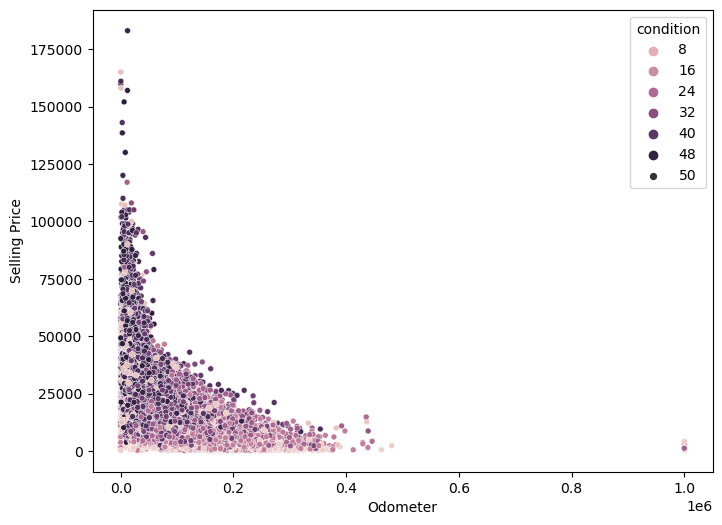

In [64]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=cp_fillna,
    x='odometer',
    y='sellingprice',
    hue='condition',size=50);
plt.xlabel('Odometer')
plt.ylabel('Selling Price')
plt.savefig("sp_od_co")

Clearly, higher the value in the condition column, the more is the selling price. Cars with lower odometer readings and a condition rating of 30 or higher tend to command higher selling prices. Conversely, when the odometer reading is higher, the condition rating is predominantly less than 30, resulting in a decrease in the selling price.

### The most preffered combination of model,body and transmission type :

In [65]:
pc = cp.groupby(['body', 'transmission','model']).size().reset_index(name='count')
most_preferred_combination = pc.loc[pc['count'].idxmax()]
# Print the most preferred combination
print("The most preferred combination of body and transmission type:")
print(most_preferred_combination)

The most preferred combination of body and transmission type:
body                Sedan
transmission    automatic
model              Altima
count               15038
Name: 943, dtype: object


### Which manufacrurer is the best seller ?

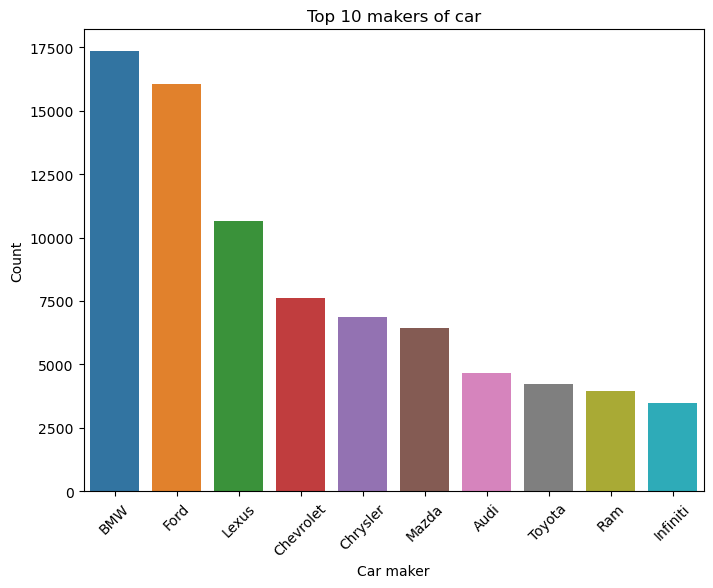

In [66]:
Top_make = cp_fillna['make'].value_counts().head(10)
plt.figure(figsize=(8, 6))
sns.barplot(x = Top_make.index, y = Top_make.values)
plt.title('Top 10 makers of car')
plt.xlabel('Car maker')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.savefig("top_makers")

### Which body has maximum demand ?

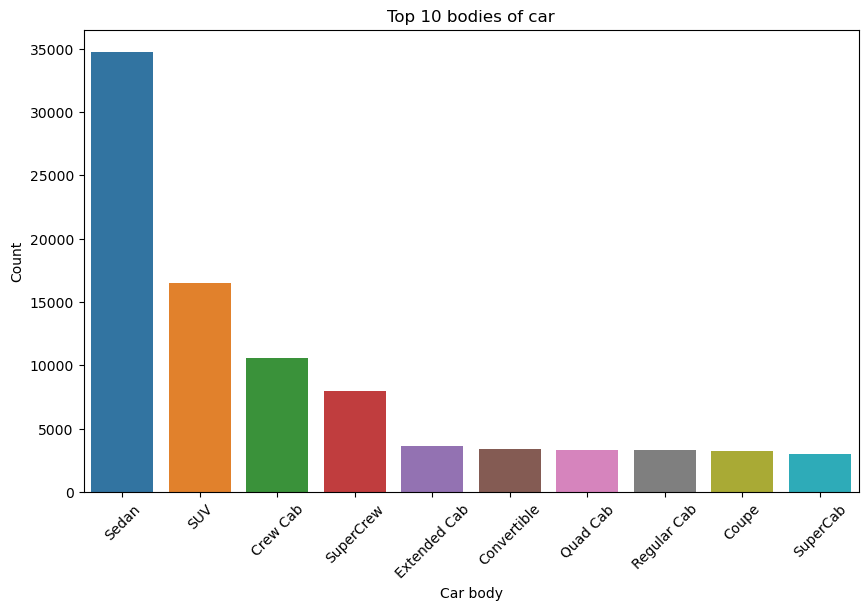

In [67]:
top_10_body = cp_fillna['body'].value_counts().head(10)

# Plotting using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_body.index, y=top_10_body.values)
plt.title('Top 10 bodies of car')
plt.xlabel('Car body')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

plt.savefig("top_body")

 ### How do the selling prices vary across the top 10 car body types?

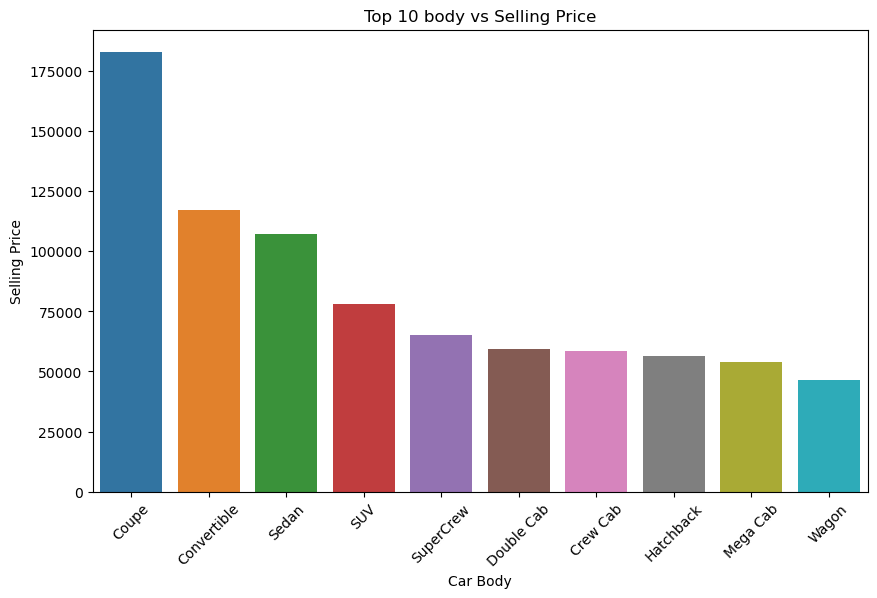

In [68]:
body_price = cp_fillna.groupby(by="body", as_index=False)["sellingprice"].max()
body_price.sort_values(by="sellingprice", ascending=False, inplace=True)
plt.figure(figsize=(10, 6))
sns.barplot(data=body_price[0:10], x="body", y="sellingprice")
plt.title("Top 10 body vs Selling Price")
plt.xlabel("Car Body")
plt.ylabel("Selling Price")
plt.xticks(rotation=45) 
plt.savefig("body_sp")

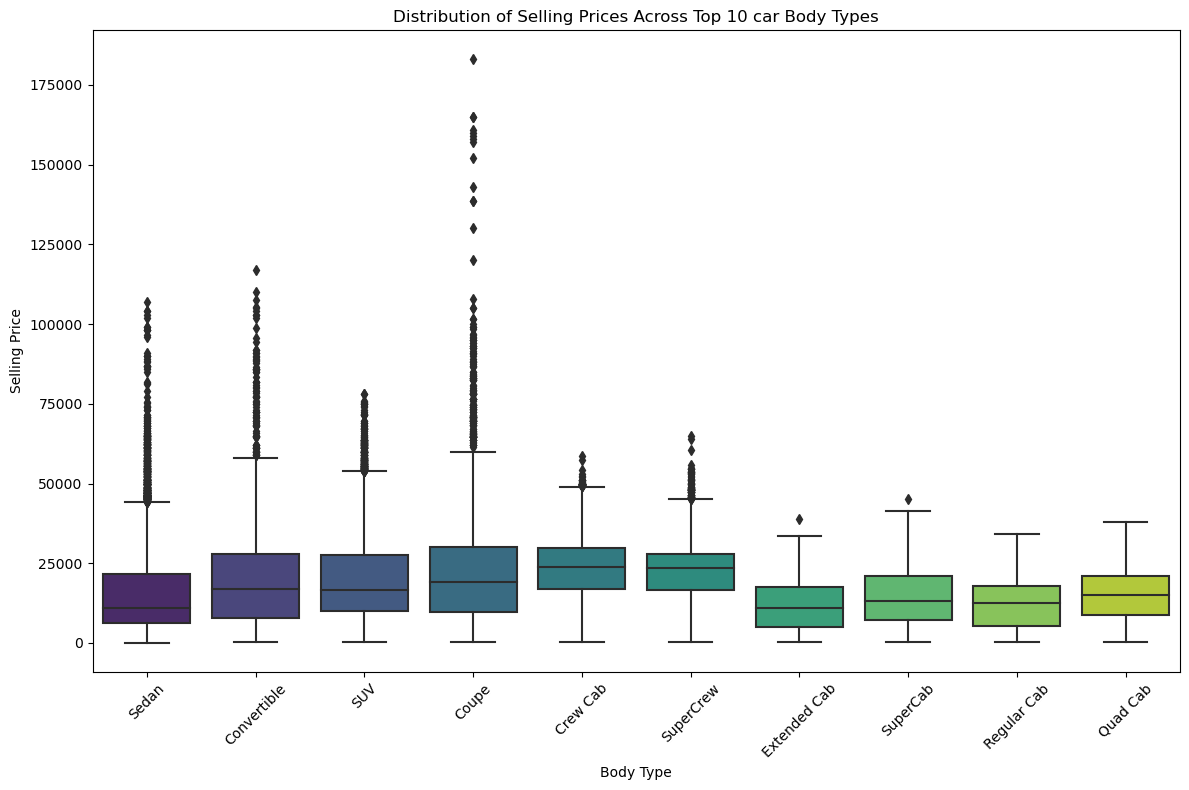

In [69]:
top_10_body_types = cp_fillna['body'].value_counts().head(10).index.tolist()

# Filter the dataset to include only the top 10 body types
filtered_data = cp_fillna[cp_fillna['body'].isin(top_10_body_types)]

# Visualize distribution of selling prices for the top 10 body types
plt.figure(figsize=(12, 8))
sns.boxplot(data=filtered_data, x='body', y='sellingprice', palette='viridis')
plt.title('Distribution of Selling Prices Across Top 10 car Body Types')
plt.xlabel('Body Type')
plt.ylabel('Selling Price')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### coupe has wide range of price variability followed by convertible and sedan due to its comfortability catering to diverse consumer preferences.

### Distribution of year production of cars

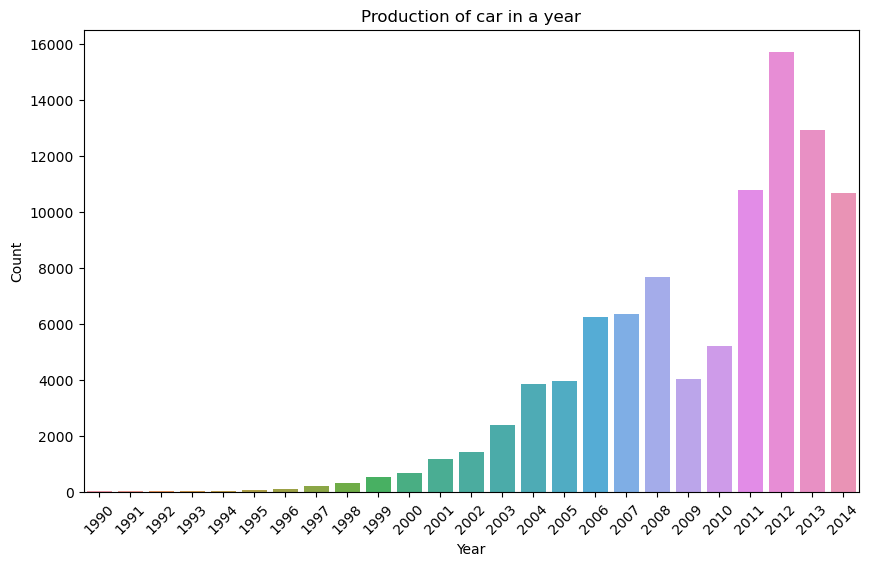

In [70]:
car_year = cp_fillna['year'].value_counts()

# Plotting using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=car_year.index, y=car_year.values)
plt.title('Production of car in a year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

### Impact of MMR on selling price

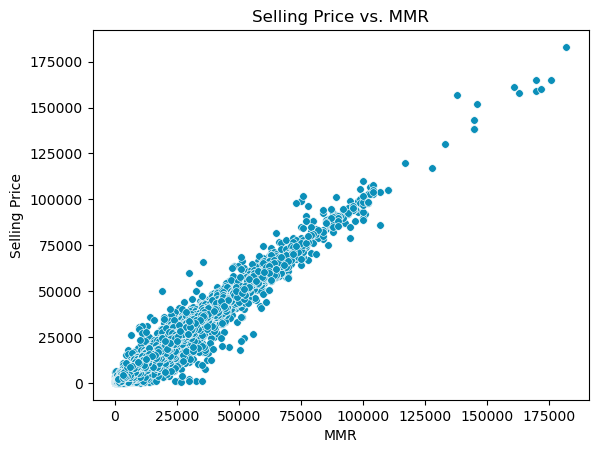

In [71]:
sns.scatterplot(cp_fillna, x="mmr", y="sellingprice", color="#0B8FB9", s=30)
plt.xlabel("MMR")
plt.ylabel("Selling Price")
plt.title("Selling Price vs. MMR")
#plt.grid(True)

plt.show()

### Which is the most preferred colors in car?

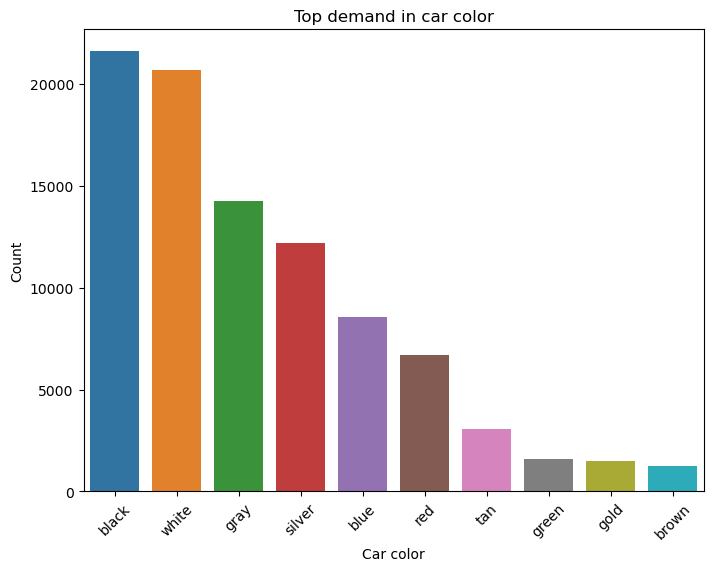

In [72]:
car_color = cp_fillna['color'].value_counts().head(10)

# Plotting using Seaborn
plt.figure(figsize=(8, 6))
sns.barplot(x=car_color.index, y=car_color.values)
plt.title('Top demand in car color')
plt.xlabel('Car color')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

plt.savefig("top_color")

### What is the most preffered color according to selling price ?

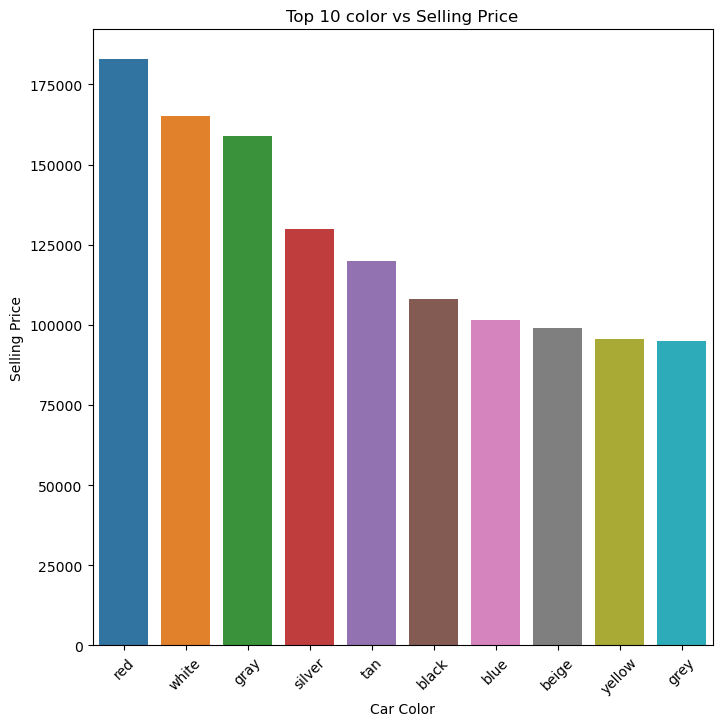

In [73]:
color_price = cp_fillna.groupby(by="color", as_index=False)["sellingprice"].max()
color_price.sort_values(by="sellingprice", ascending=False, inplace=True)

plt.figure(figsize=(8, 8))
sns.barplot(data=color_price[0:10], x="color", y="sellingprice")
plt.title("Top 10 color vs Selling Price")
plt.xlabel("Car Color")
plt.ylabel("Selling Price")
plt.xticks(rotation=45)
plt.savefig("color_sp")

- Colors like red, white, gray, and silver tend to have higher resale value compared to more unique or unconventional colors. Buyers may choose these colors with the intention of maximizing the resale value of their cars in the future.

- Popular Color Preferences: Black, white, silver, and gray are widely accepted as neutral colors and are often preferred by car buyers due to their versatility and timeless appeal. The dominance of these colors suggests that they are popular choices among consumers.

### Which month has the maximum demand?

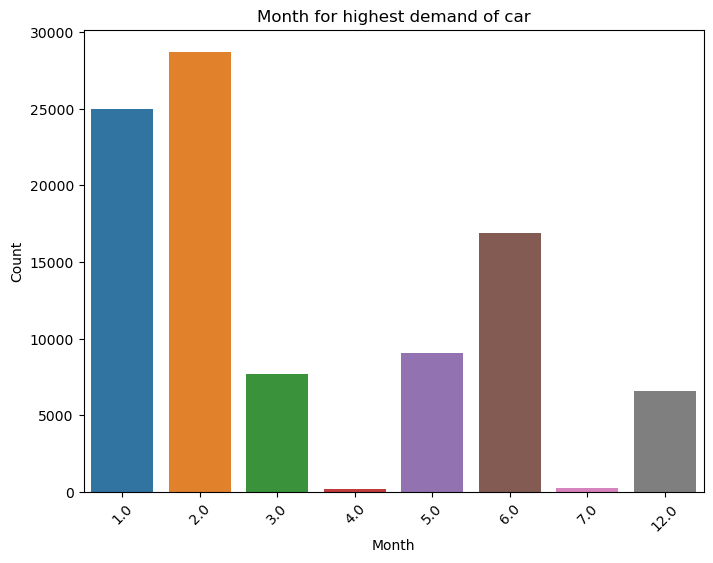

In [74]:
car_month = cp_fillna['salemonth'].value_counts()

# Plotting using Seaborn
plt.figure(figsize=(8, 6))
sns.barplot(x=car_month.index, y=car_month.values)
plt.title('Month for highest demand of car')
plt.xlabel('Month')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

plt.savefig("month_demand")

## Seasonal Variation :
The observed pattern suggests that there may be seasonal variations in car sales. The peaks in sales during the first two months could indicate higher demand at the beginning of the year, possibly due to factors like tax returns, year-end bonuses, or new model releases. Similarly, increased sales in the 5th, 6th, and 12th months might be influenced by seasonal events or promotions, such as end-of-year sales or holiday discounts.

- #### Inventory Management: 
Dealerships may adjust their inventory management strategies based on seasonal demand patterns. Higher sales in certain months could lead to adjustments in inventory levels and pricing strategies to optimize sales and maximize profits.

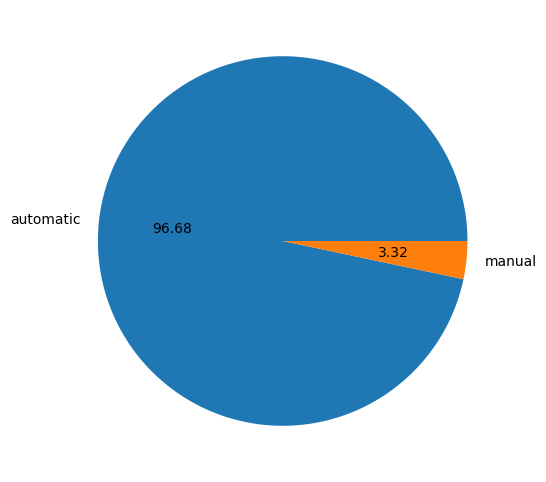

In [75]:
# transmission distribution
plt.figure(figsize=(8, 6))
plt.pie(cp_fillna.transmission.value_counts(),labels=cp_fillna.transmission.unique(),autopct="%.2f",radius=1);
plt.savefig("transmission")

#### It appears that the most number of cars that were sold are automatic which is about 96.68% of the entire sales. So it implies that resale of automatic cars happen more as compared to manual. 

### Which color and interior has highest demand for each body type?

In [76]:
body_color_interior_counts = cp_fillna.groupby(['body', 'color', 'interior']).size().reset_index(name='count')

# Iterate over each unique body type
bodies = cp_fillna['body'].unique()
preferred_combo = []

for body_type in bodies:
    body_data = body_color_interior_counts[body_color_interior_counts['body'] == body_type]
    

    if not body_data.empty:
        # Find the most preferred color and interior combo for the current body type
        most_preferred_combo = body_data.loc[body_data['count'].idxmax()]
        preferred_combo.append({
            'Body Type': body_type,
            'Color': most_preferred_combo['color'],
            'Interior': most_preferred_combo['interior'],
            'Frequency': most_preferred_combo['count']
        })

preferred_combo = pd.DataFrame(preferred_combo)

print("Most Preferred Color and Interior Combo for Each Unique Body Type:")
preferred_combo[:10]

Most Preferred Color and Interior Combo for Each Unique Body Type:


,Body Type,Color,Interior,Frequency
0,Sedan,black,black,5758
1,Convertible,black,black,493
2,SUV,black,black,2098
3,Hatchback,black,black,359
4,Coupe,black,black,676
5,Minivan,gray,black,110
6,Crew Cab,white,black,1346
7,SuperCrew,white,gray,977
8,Extended Cab,white,black,409
9,SuperCab,white,gray,700


### Which model has maximum demand for each manufacturer?

In [77]:

make_model_counts = cp.groupby(['make', 'model','body','color']).size().reset_index(name='count')

most_selling_models = make_model_counts.loc[make_model_counts.groupby('make')['count'].idxmax()]

print("Most Selling Model for Each Make:")
most_selling_models[:10]

Most Selling Model for Each Make:


,make,model,body,color,count
90,Acura,TL,Sedan,black,624
142,Aston Martin,V8 Vantage,Coupe,black,7
168,Audi,A4,Sedan,black,565
448,BMW,3 Series,Sedan,black,1794
742,Bentley,Continental GT,Coupe,black,16
811,Buick,LaCrosse,Sedan,silver,257
932,Cadillac,CTS,Sedan,black,593
1523,Chevrolet,Impala,Sedan,silver,1815
2246,Chrysler,Town and Country,Minivan,white,1053
2253,Daewoo,Leganza,Sedan,blue,1


### What is the demographics for different companies? i.e., which car was sold the most in the different states present in the dataset.¶

In [78]:
make_counts = cp_fillna.groupby(['state', 'make']).size()

most_sold_make_by_state = make_counts.groupby('state').idxmax().apply(lambda x: x[1])

print(most_sold_make_by_state)

state
al        Ford
az        Ford
ca         BMW
co        Ford
fl       Lexus
ga         BMW
hi        Ford
il        Ford
in    Chrysler
la        Ford
ma         BMW
md         BMW
mi        Ford
mn        Ford
mo        Ford
ms        Ford
nc         BMW
ne        Ford
nj         BMW
nm        Ford
nv         BMW
ny        Ford
oh         BMW
ok        Ford
or        Ford
pa        Ford
pr      Suzuki
sc         BMW
tn        Ford
tx        Ford
ut        Ford
va         BMW
wa        Ford
wi         BMW
dtype: object


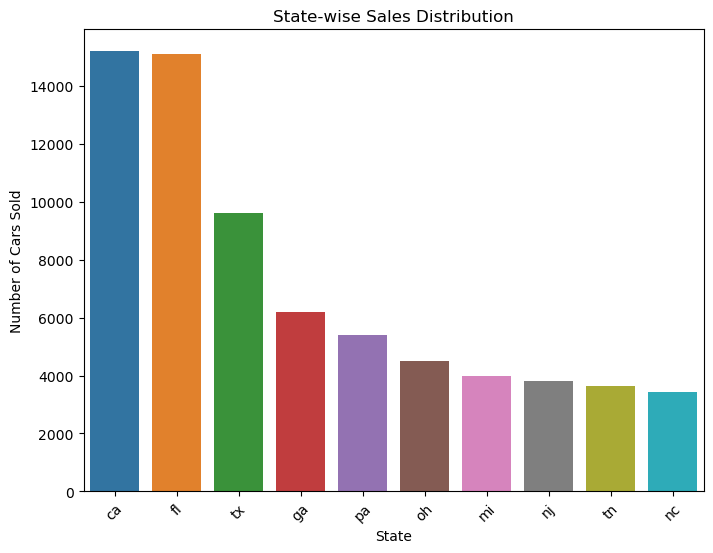

In [79]:
state_sales = cp_fillna['state'].value_counts().head(10)
plt.figure(figsize=(8, 6))
sns.barplot(x=state_sales.index, y=state_sales.values)
plt.title('State-wise Sales Distribution')
plt.xlabel('State')
plt.ylabel('Number of Cars Sold')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

plt.savefig("state_max car")

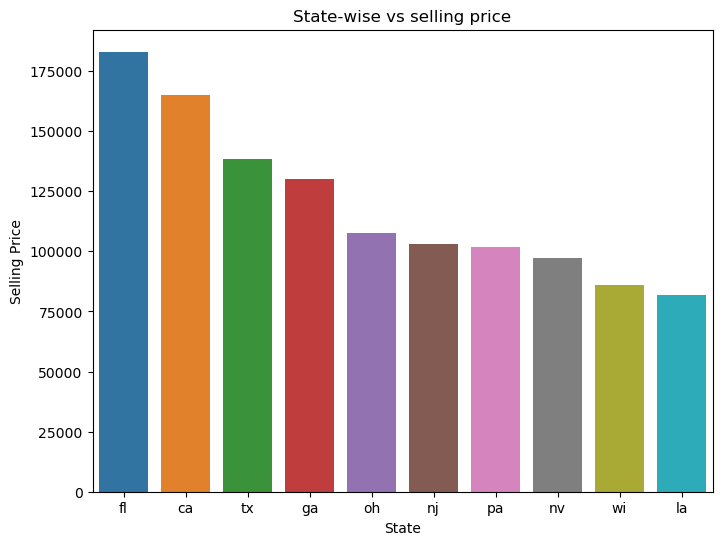

In [80]:
state_price = cp_fillna.groupby(['state'], as_index=False)["sellingprice"].max()
state_price.sort_values(by="sellingprice", ascending=False, inplace=True)
#display(state_price)
plt.figure(figsize=(8, 6))
sns.barplot(data=state_price[0:10], x="state", y="sellingprice")
plt.title("State-wise vs selling price")
plt.xlabel("State")
plt.ylabel("Selling Price")

plt.savefig("state_sp")

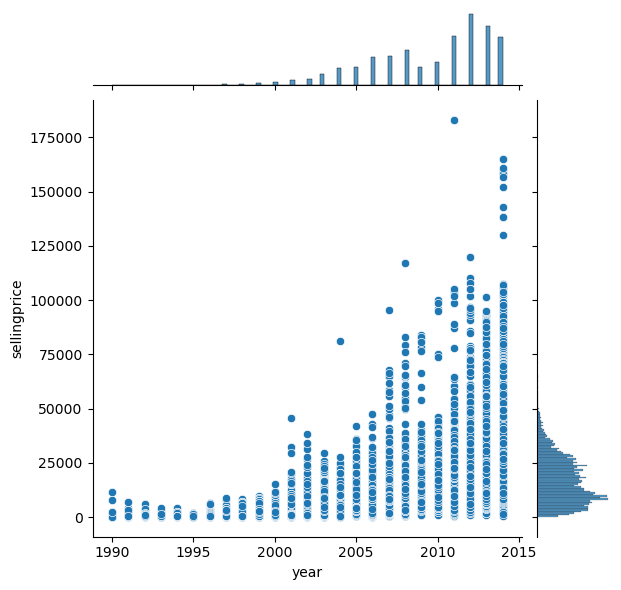

In [81]:
sns.jointplot(x = 'year', y = 'sellingprice', data = cp_fillna)

### Label Encoding

In [82]:
encoder = LabelEncoder()

In [83]:
enc_cp = cp_fillna.copy()

In [84]:
enc_cp['trim'] = enc_cp['trim'].astype(str)

enc_cp['make'] = encoder.fit_transform(enc_cp['make'])
enc_cp['model'] = encoder.fit_transform(enc_cp['model'])
enc_cp['trim'] = encoder.fit_transform(enc_cp['trim'])
enc_cp['body'] = encoder.fit_transform(enc_cp['body'])
enc_cp['transmission'] = encoder.fit_transform(enc_cp['transmission'])
enc_cp['state'] = encoder.fit_transform(enc_cp['state'])
enc_cp['color'] = encoder.fit_transform(enc_cp['color'])
enc_cp['interior'] = encoder.fit_transform(enc_cp['interior'])
enc_cp['seller'] = encoder.fit_transform(enc_cp['seller'])

In [85]:
display(cp_fillna.head(5))
display(enc_cp.head(5))

,year,make,model,trim,body,transmission,state,condition,odometer,color,interior,seller,mmr,sellingprice,saleyear,salemonth
2,2014,BMW,3.0,328i SULEV,Sedan,automatic,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,2015.0,1.0
21,2014,BMW,5.0,528i,Sedan,automatic,ca,29.0,25969.0,black,black,financial services remarketing (lease),34200.0,30000.0,2015.0,2.0
24,2014,BMW,6.0,650i,Convertible,automatic,ca,38.0,10736.0,black,black,the hertz corporation,67000.0,65000.0,2015.0,1.0
31,2014,Audi,5.0,3.0T Premium Plus quattro,SUV,automatic,ca,42.0,9606.0,white,black,audi of downtown l a,48600.0,47500.0,2015.0,1.0
37,2014,BMW,3.0,328i SULEV,Sedan,automatic,ca,5.0,111.0,black,turquoise,financial services remarketing (lease),32200.0,30500.0,2015.0,1.0


,year,make,model,trim,body,transmission,state,condition,odometer,color,interior,seller,mmr,sellingprice,saleyear,salemonth
2,2014,2,2,81,15,0,2,45.0,1331.0,7,1,2317,31900.0,30000.0,2015.0,1.0
21,2014,2,4,120,15,0,2,29.0,25969.0,1,1,2317,34200.0,30000.0,2015.0,2.0
24,2014,2,5,138,0,0,2,38.0,10736.0,1,1,6117,67000.0,65000.0,2015.0,1.0
31,2014,1,4,44,14,0,2,42.0,9606.0,18,1,382,48600.0,47500.0,2015.0,1.0
37,2014,2,2,81,15,0,2,5.0,111.0,1,15,2317,32200.0,30500.0,2015.0,1.0


### Feature Engineering

In [86]:
cp_fe = enc_cp.copy()

In [87]:
cp_fe.describe()

,year,make,model,trim,body,transmission,state,condition,color,interior,seller,mmr,saleyear,salemonth
count,94449.000000,94449.000000,94449.000000,94449.000000,94449.000000,94449.00000,94449.000000,94449.000000,94449.00000,94449.000000,94449.000000,94449.000000,94449.000000,94449.000000
mean,2009.529058,9.873911,22.259272,219.183094,11.766318,0.03315,13.943250,31.095057,9.27509,4.009995,3426.933202,17440.464695,2014.930121,3.537496
std,3.788421,7.994321,17.519437,99.902269,5.598298,0.17903,10.707535,12.866001,6.88580,4.409566,1956.786924,11544.614187,0.254944,2.960719
min,1990.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1.000000,0.00000,0.000000,0.000000,25.000000,2014.000000,1.000000
25%,2007.000000,3.000000,4.000000,163.000000,9.000000,0.00000,4.000000,24.000000,2.00000,1.000000,1989.000000,8575.000000,2015.000000,1.000000
50%,2011.000000,8.000000,26.000000,232.000000,15.000000,0.00000,12.000000,34.000000,7.00000,1.000000,3288.000000,15600.000000,2015.000000,2.000000
75%,2013.000000,15.000000,32.000000,312.000000,15.000000,0.00000,25.000000,41.000000,16.00000,6.000000,5233.000000,24600.000000,2015.000000,6.000000
max,2014.000000,29.000000,54.000000,379.000000,20.000000,1.00000,33.000000,49.000000,19.00000,17.000000,6791.000000,182000.000000,2015.000000,12.000000


In [88]:
cp_fe['Car_age'] = cp_fe['saleyear'] - cp_fe['year']
cp_fe['Milesperyear'] = cp_fe['odometer'] / cp_fe['Car_age']

In [89]:
cp_fe.shape

(94449, 18)

In [90]:
cp_fe.head(5)

,year,make,model,trim,body,transmission,state,condition,odometer,color,interior,seller,mmr,sellingprice,saleyear,salemonth,Car_age,Milesperyear
2,2014,2,2,81,15,0,2,45.0,1331.0,7,1,2317,31900.0,30000.0,2015.0,1.0,1.0,1331.0
21,2014,2,4,120,15,0,2,29.0,25969.0,1,1,2317,34200.0,30000.0,2015.0,2.0,1.0,25969.0
24,2014,2,5,138,0,0,2,38.0,10736.0,1,1,6117,67000.0,65000.0,2015.0,1.0,1.0,10736.0
31,2014,1,4,44,14,0,2,42.0,9606.0,18,1,382,48600.0,47500.0,2015.0,1.0,1.0,9606.0
37,2014,2,2,81,15,0,2,5.0,111.0,1,15,2317,32200.0,30500.0,2015.0,1.0,1.0,111.0


### Outlier Removal

In [91]:
# Initialize the Isolation Forest model
iso_forest = IsolationForest(n_estimators=50, contamination=0.1, random_state=42)

# Select all columns for outlier
iso_forest.fit(cp_fe)

# Predict outliers using the fitted model
pred = iso_forest.predict(cp_fe)

# Add the predictions to the DataFrame to mark rows as outliers (-1) or inliers (1)
cp_fe['outlier'] = pred

# filter the DataFrame to see outliers or inliers
outliers = cp_fe[cp_fe['outlier'] == -1]
inliers = cp_fe[cp_fe['outlier'] == 1]

print("Detected outliers:\n", outliers)
print("\nDetected inliers:\n", inliers)

Detected outliers:
         year  make  model  trim  body  transmission  state  condition  \
24      2014     2      5   138     0             0      2       38.0   
42      2014     2      5   138     0             0      2       32.0   
68      2014     2      5   138     0             0      2        4.0   
104     2014     2      5   138     0             0      2       38.0   
359     2013    15     32   163    15             0      2       36.0   
...      ...   ...    ...   ...   ...           ...    ...        ...   
558079  2009     1      4   360     1             1     25       22.0   
558199  2002    21     47   327     1             0      2       31.0   
558472  2002    29     20    28    15             0     10       19.0   
558547  1999    27      3   163    14             0     10        2.0   
558647  2000    29     21   344    19             0     25       33.0   

        odometer  color  interior  seller      mmr sellingprice  saleyear  \
24       10736.0      1   

In [92]:
# Count the number of outliers and inliers
num_outliers = (cp_fe['outlier'] == -1).sum()
num_inliers = (cp_fe['outlier'] == 1).sum()

print(f"Number of detected outliers: {num_outliers}")
print(f"Number of detected inliers (non-outliers): {num_inliers}")

Number of detected outliers: 9445
Number of detected inliers (non-outliers): 85004


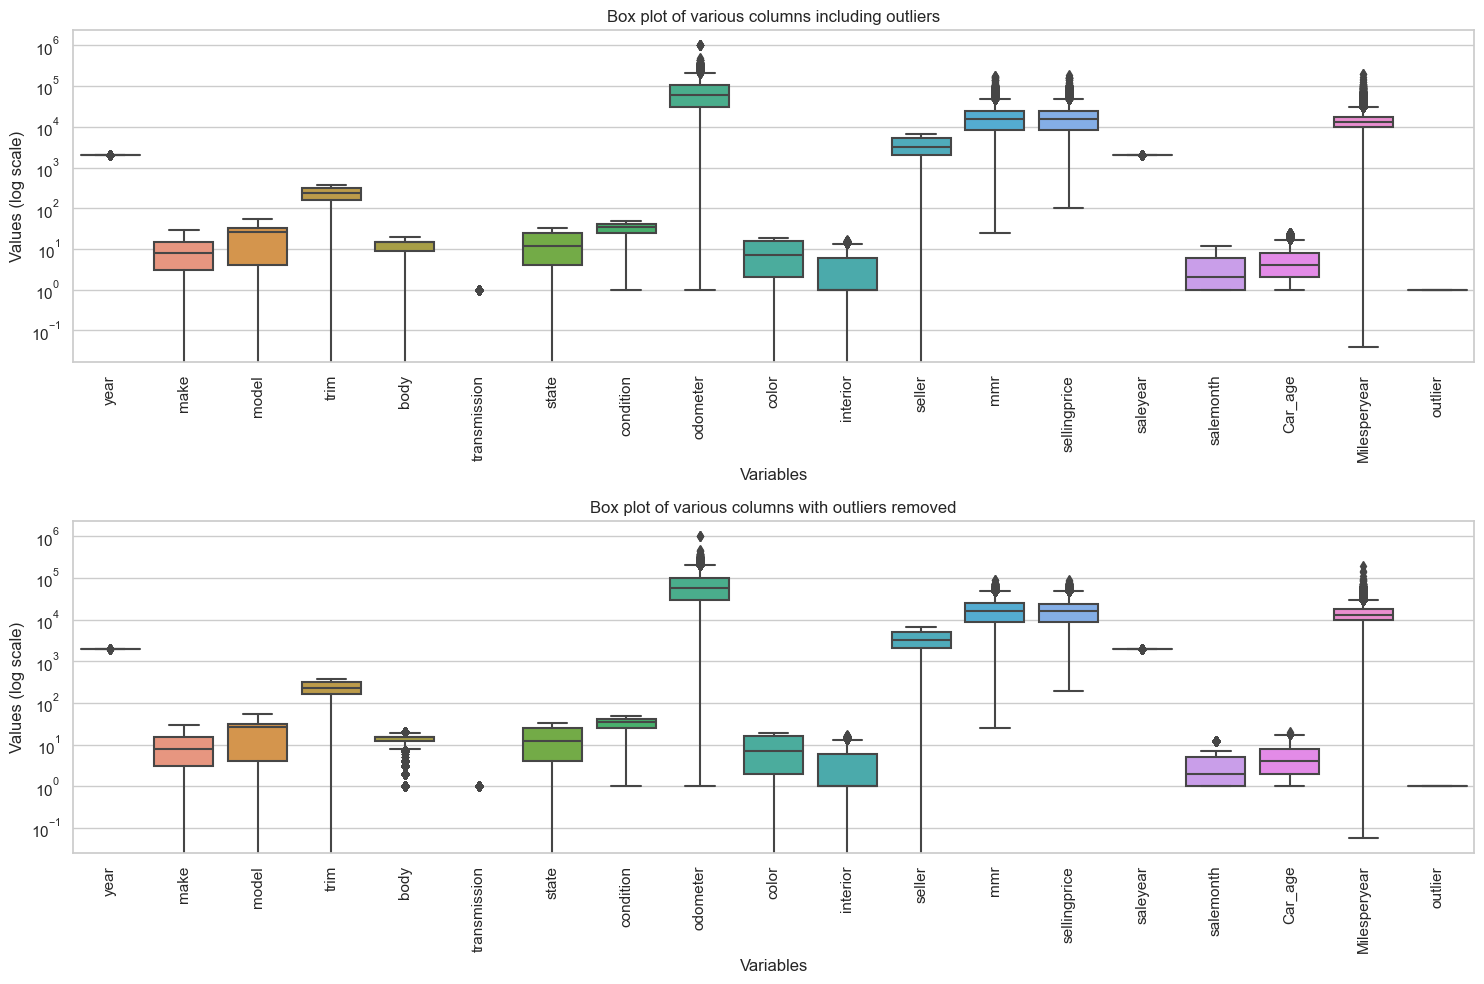

In [93]:
# Set the style of the visualization
sns.set(style="whitegrid")

# Create a figure with subplots arranged in 2 rows and 1 column
fig, axes = plt.subplots(2, 1, figsize=(15, 10))

# Plot boxplot for all columns in df_cleaned
sns.boxplot(data=pd.melt(cp_fe), x="variable", y="value", ax=axes[0])
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=90)
axes[0].set_yscale('log')
axes[0].set_title('Box plot of various columns including outliers')
axes[0].set_xlabel('Variables')
axes[0].set_ylabel('Values (log scale)')

# Plot boxplot for all columns in inliers
sns.boxplot(data=pd.melt(inliers), x="variable", y="value", ax=axes[1])
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=90)
axes[1].set_yscale('log')
axes[1].set_title('Box plot of various columns with outliers removed')
axes[1].set_xlabel('Variables')
axes[1].set_ylabel('Values (log scale)')

# Adjust layout for better fit
plt.tight_layout()

# Show the plot
plt.show()

In [94]:
# Remove dataset with outlier
cp_fe_cleaned = cp_fe[cp_fe['outlier'] != -1]

print(f"Dimension of dataset after outliers removal: {cp_fe_cleaned.shape}")

Dimension of dataset after outliers removal: (85004, 19)


In [95]:
cp_fe_cleaned.head(5)

,year,make,model,trim,body,transmission,state,condition,odometer,color,interior,seller,mmr,sellingprice,saleyear,salemonth,Car_age,Milesperyear,outlier
2,2014,2,2,81,15,0,2,45.0,1331.0,7,1,2317,31900.0,30000.0,2015.0,1.0,1.0,1331.0,1
21,2014,2,4,120,15,0,2,29.0,25969.0,1,1,2317,34200.0,30000.0,2015.0,2.0,1.0,25969.0,1
31,2014,1,4,44,14,0,2,42.0,9606.0,18,1,382,48600.0,47500.0,2015.0,1.0,1.0,9606.0,1
37,2014,2,2,81,15,0,2,5.0,111.0,1,15,2317,32200.0,30500.0,2015.0,1.0,1.0,111.0,1
38,2014,2,4,163,15,0,2,38.0,16360.0,1,1,6117,65000.0,64250.0,2015.0,1.0,1.0,16360.0,1


### Collinear features analysis with Pearson Correlation

In [96]:
cp_feat = cp_fe_cleaned.drop(columns=['outlier', 'sellingprice'])
cp_feat.head(5)

,year,make,model,trim,body,transmission,state,condition,odometer,color,interior,seller,mmr,saleyear,salemonth,Car_age,Milesperyear
2,2014,2,2,81,15,0,2,45.0,1331.0,7,1,2317,31900.0,2015.0,1.0,1.0,1331.0
21,2014,2,4,120,15,0,2,29.0,25969.0,1,1,2317,34200.0,2015.0,2.0,1.0,25969.0
31,2014,1,4,44,14,0,2,42.0,9606.0,18,1,382,48600.0,2015.0,1.0,1.0,9606.0
37,2014,2,2,81,15,0,2,5.0,111.0,1,15,2317,32200.0,2015.0,1.0,1.0,111.0
38,2014,2,4,163,15,0,2,38.0,16360.0,1,1,6117,65000.0,2015.0,1.0,1.0,16360.0


In [97]:
print('Dimension of datasets before Pearson Correlation: ', cp_feat.shape)

Dimension of datasets before Pearson Correlation:  (85004, 17)


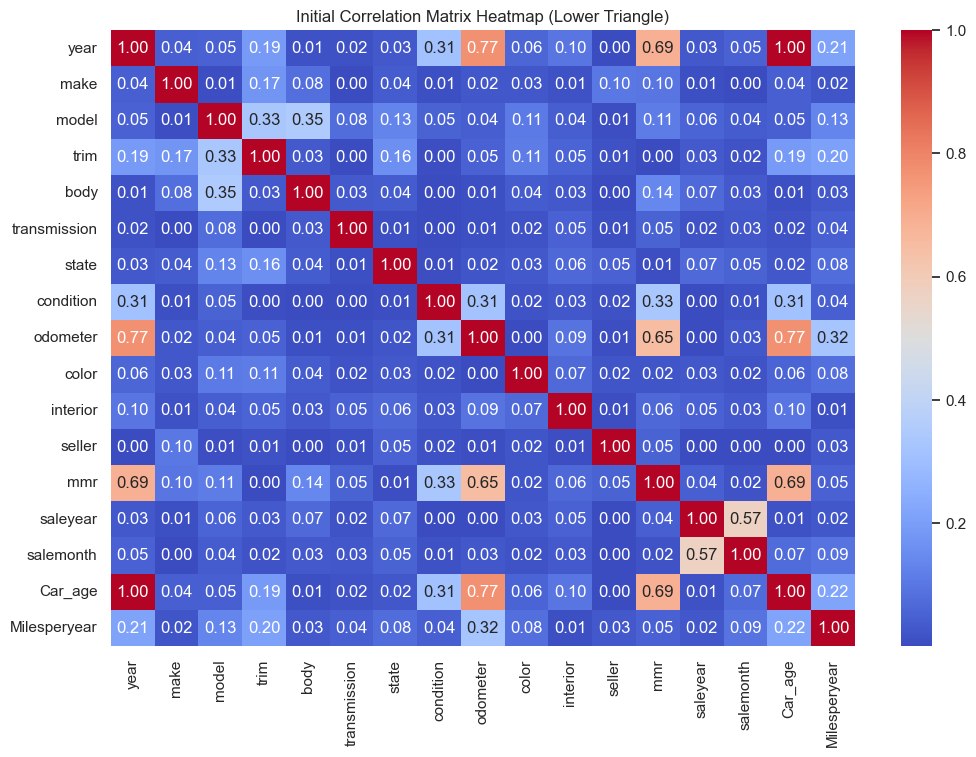

In [98]:
# Calculate the Pearson correlation matrix
corr_matrix = cp_feat.corr().abs()

# Plot the heatmap of the initial correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Initial Correlation Matrix Heatmap (Lower Triangle)')
plt.show()

In [99]:
# Find columns with correlation greater than threshold
thres_corr = 0.9

high_corr_columns = set()  # Use a set to avoid duplicates
for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
        if corr_matrix.iloc[i, j] > thres_corr:
            high_corr_columns.add(corr_matrix.columns[i])
            high_corr_columns.add(corr_matrix.columns[j])

# Print columns with correlation greater than threshold
print('Columns with correlation > ', thres_corr,':')
for column in high_corr_columns:
    print(column)

Columns with correlation >  0.9 :
year
Car_age


In [100]:
cp_feat = cp_feat.drop(columns=['Car_age'])

In [101]:
print('Dimension of dataset after Pearson correlation :', cp_feat.shape)

Dimension of dataset after Pearson correlation : (85004, 16)


### Feature Scaling

In [102]:
scl = StandardScaler()

#### Scaling the data that contains the 'outliers'.

In [103]:
cp_fe_s = scl.fit_transform(cp_fe)

In [104]:
cp_fe_s_df = pd.DataFrame(cp_fe_s, columns=cp_fe.columns)
cp_fe_s_df.head(5)

,year,make,model,trim,body,transmission,state,condition,odometer,color,interior,seller,mmr,sellingprice,saleyear,salemonth,Car_age,Milesperyear,outlier
0,1.180166,-0.984943,-1.156394,-1.383190,0.577622,-0.185167,-1.115412,1.080757,-1.323581,-0.330405,-0.682609,-0.567225,1.252498,1.089342,0.274097,-0.857059,-1.165442,-1.678986,0.333335
1,1.180166,-0.984943,-1.042235,-0.992806,0.577622,-0.185167,-1.115412,-0.162838,-0.867573,-1.201768,-0.682609,-0.567225,1.451727,1.089342,0.274097,-0.519301,-1.165442,1.405122,0.333335
2,1.180166,-0.984943,-0.985155,-0.812629,-2.101778,-0.185167,-1.115412,0.536684,-1.149510,-1.201768,-0.682609,1.374744,4.292893,4.090691,0.274097,-0.857059,-1.165442,-0.501697,-2.999982
3,1.180166,-1.110033,-1.042235,-1.753554,0.398995,-0.185167,-1.115412,0.847583,-1.170425,1.267094,-0.682609,-1.556097,2.699068,2.590017,0.274097,-0.857059,-1.165442,-0.643147,0.333335
4,1.180166,-0.984943,-1.156394,-1.383190,0.577622,-0.185167,-1.115412,-2.028229,-1.346161,-1.201768,2.492323,-0.567225,1.278485,1.132219,0.274097,-0.857059,-1.165442,-1.831702,0.333335


#### Scaling the data that does not contain 'outliers'

In [105]:
scl = StandardScaler()

cp_feat_s = scl.fit_transform(cp_feat)
cp_feat_s.shape

(85004, 16)

In [106]:
# Transform them back into a DataFrame
cp_feat_s_df = pd.DataFrame(cp_feat_s, columns=cp_feat.columns)
cp_feat_s_df.head(5)

,year,make,model,trim,body,transmission,state,condition,odometer,color,interior,seller,mmr,saleyear,salemonth,Milesperyear
0,1.220899,-0.994591,-1.168394,-1.411439,0.548465,-0.116901,-1.11485,1.070627,-1.382209,-0.332365,-0.669234,-0.577110,1.390767,0.148165,-0.909803,-1.798303
1,1.220899,-0.994591,-1.053215,-1.019030,0.548465,-0.116901,-1.11485,-0.204872,-0.887483,-1.203699,-0.669234,-0.577110,1.612594,0.148165,-0.475170,1.530819
2,1.220899,-1.122252,-1.053215,-1.783725,0.363936,-0.116901,-1.11485,0.831471,-1.216049,1.265079,-0.669234,-1.574316,3.001428,0.148165,-0.909803,-0.680173
3,1.220899,-0.994591,-1.168394,-1.411439,0.548465,-0.116901,-1.11485,-2.118121,-1.406706,-1.203699,2.612627,-0.577110,1.419701,0.148165,-0.909803,-1.963152
4,1.220899,-0.994591,-1.053215,-0.586373,0.548465,-0.116901,-1.11485,0.512596,-1.080430,-1.203699,-0.669234,1.381228,4.583156,0.148165,-0.909803,0.232437


### Differentiate features continuous and features categorical


In [107]:
cp_fe.describe()

,year,make,model,trim,body,transmission,state,condition,color,interior,seller,mmr,saleyear,salemonth,Car_age,outlier
count,94449.000000,94449.000000,94449.000000,94449.000000,94449.000000,94449.00000,94449.000000,94449.000000,94449.00000,94449.000000,94449.000000,94449.000000,94449.000000,94449.000000,94449.000000,94449.000000
mean,2009.529058,9.873911,22.259272,219.183094,11.766318,0.03315,13.943250,31.095057,9.27509,4.009995,3426.933202,17440.464695,2014.930121,3.537496,5.401063,0.799998
std,3.788421,7.994321,17.519437,99.902269,5.598298,0.17903,10.707535,12.866001,6.88580,4.409566,1956.786924,11544.614187,0.254944,2.960719,3.776325,0.600006
min,1990.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1.000000,0.00000,0.000000,0.000000,25.000000,2014.000000,1.000000,1.000000,-1.000000
25%,2007.000000,3.000000,4.000000,163.000000,9.000000,0.00000,4.000000,24.000000,2.00000,1.000000,1989.000000,8575.000000,2015.000000,1.000000,2.000000,1.000000
50%,2011.000000,8.000000,26.000000,232.000000,15.000000,0.00000,12.000000,34.000000,7.00000,1.000000,3288.000000,15600.000000,2015.000000,2.000000,4.000000,1.000000
75%,2013.000000,15.000000,32.000000,312.000000,15.000000,0.00000,25.000000,41.000000,16.00000,6.000000,5233.000000,24600.000000,2015.000000,6.000000,8.000000,1.000000
max,2014.000000,29.000000,54.000000,379.000000,20.000000,1.00000,33.000000,49.000000,19.00000,17.000000,6791.000000,182000.000000,2015.000000,12.000000,25.000000,1.000000


In [108]:
X_cat = cp_feat_s_df.drop(columns=['odometer','mmr', 'Milesperyear'])
X_cont = cp_feat_s_df[['odometer','mmr', 'Milesperyear']]
y = cp_fe_cleaned[['sellingprice']]
y['sellingprice'] = y['sellingprice'].astype(int)

print('Dimension of categorical features :', X_cat.shape)
print('Dimension of continuous features :', X_cont.shape)
print('Dimension of target :', y.shape)

Dimension of categorical features : (85004, 13)
Dimension of continuous features : (85004, 3)
Dimension of target : (85004, 1)


### Feature Selection with ANOVA
#### Continuous Features

In [109]:
# Calculate F, p, and MI values
f1,p1 = f_regression(X_cont, y.values)  ### is indicator of linear relationships
mi1 = mutual_info_regression(X_cont.values, y.values) ### is indicator of non-linear relationships
mi1 /= np.max(mi1)
f1 /= np.max(f1)

In [110]:
# Set threshold for F values
f_threshold = 0.8

# Set threshold for p values
p_threshold = 0.01

# Set threshold for MI values
mi_threshold = 0.8

Text(0.5, 0, 'Features')

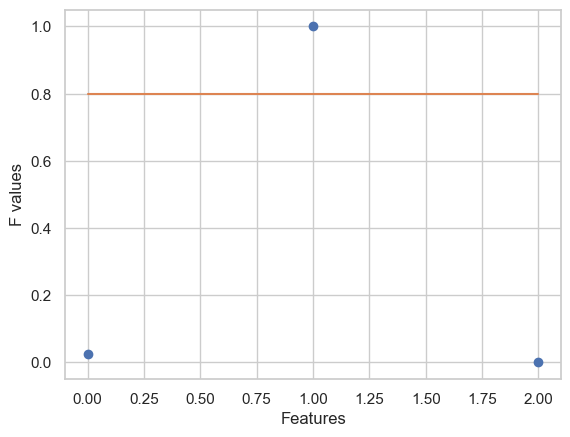

In [111]:
# Visualize the F values
plt.figure()
plt.plot(f1, 'o')
plt.plot(f_threshold*np.ones(len(f1)))
plt.ylabel('F values')
plt.xlabel('Features')

Text(0.5, 0, 'Features')

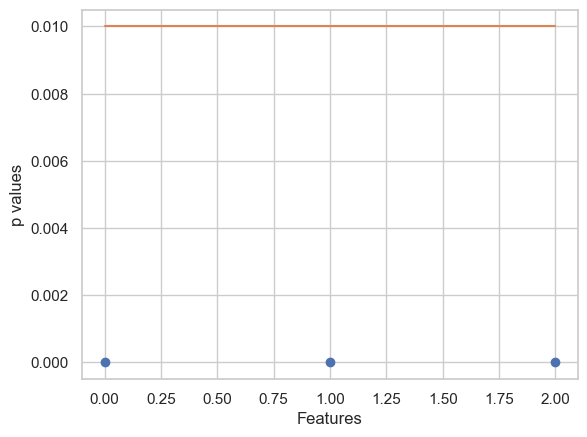

In [112]:
# Visualize the p values
plt.figure()
plt.plot(p1, 'o')
plt.plot(p_threshold*np.ones(len(p1)))
plt.ylabel('p values')
plt.xlabel('Features')

Text(0.5, 0, 'Features')

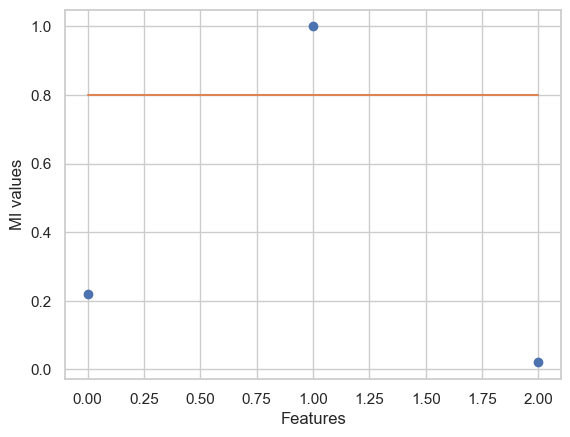

In [113]:
# Visualize the MI values
plt.figure()
plt.plot(mi1, 'o')
plt.plot(mi_threshold*np.ones(len(mi1)))
plt.ylabel('MI values')
plt.xlabel('Features')

In [114]:
# Create mask for feature selection with F and MI values
mask_feasel_cont = ((f1 > f_threshold) & (p1 > p_threshold) | (mi1 > mi_threshold))

# Show the number of significant features
num_sel_feat_cont = (mask_feasel_cont == True).sum()
print('Number of selected continuous features:', num_sel_feat_cont)

# Show 5 selected features
sel_feat_cont = X_cont.columns[mask_feasel_cont].tolist()
print('Selected features:', sel_feat_cont)

Number of selected continuous features: 1
Selected features: ['mmr']


#### Categorical Features

In [115]:
# Calculate F, p, and MI values
f2,p2 = f_classif(X_cat, y.values)  ### is indicator of linear relationships
mi2 = mutual_info_regression(X_cat.values, y.values) ### is indicator of non-linear relationships
mi2 /= np.max(mi2)
f2 /= np.max(f2)

In [116]:
# Set threshold for F values
f2_threshold = 0.05

# Set threshold for p values
p2_threshold = 0.01

# Set threshold for MI values
mi2_threshold = 0.5

Text(0.5, 0, 'Features')

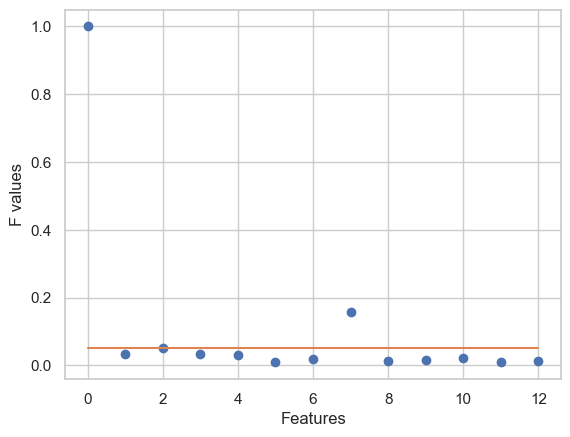

In [117]:
# Visualize the F values
plt.figure()
plt.plot(f2, 'o')
plt.plot(f2_threshold*np.ones(len(f2)))
plt.ylabel('F values')
plt.xlabel('Features')

Text(0.5, 0, 'Features')

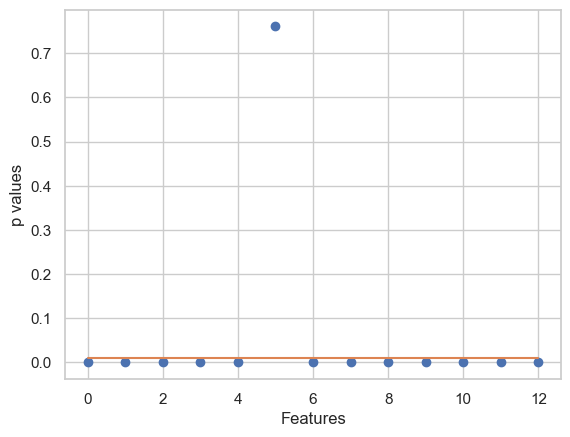

In [118]:
# Visualize the p values
plt.figure()
plt.plot(p2, 'o')
plt.plot(p2_threshold*np.ones(len(p2)))
plt.ylabel('p values')
plt.xlabel('Features')

Text(0.5, 0, 'Features')

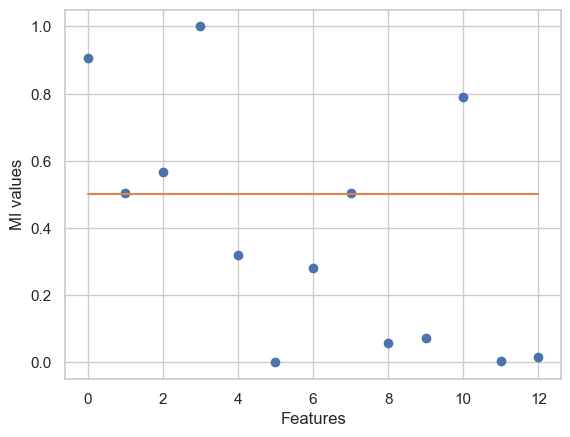

In [119]:
# Visualize the MI values
plt.figure()
plt.plot(mi2, 'o')
plt.plot(mi2_threshold*np.ones(len(mi2)))
plt.ylabel('MI values')
plt.xlabel('Features')

In [120]:
# Create mask for feature selection with F and MI values
mask_feasel_cat = ((f2 > f2_threshold) & (p2 > p2_threshold) | (mi2 > mi2_threshold))

# Show the number of significant features
num_sel_feat_cat = (mask_feasel_cat == True).sum()
print('Number of selected categorical features:', num_sel_feat_cat)

# Show the selected features
sel_feat_cat = X_cat.columns[mask_feasel_cat].tolist()
print('Selected features:', sel_feat_cat)

Number of selected categorical features: 6
Selected features: ['year', 'make', 'model', 'trim', 'condition', 'seller']


In [121]:
cp_feat_s_df.head(5)

,year,make,model,trim,body,transmission,state,condition,odometer,color,interior,seller,mmr,saleyear,salemonth,Milesperyear
0,1.220899,-0.994591,-1.168394,-1.411439,0.548465,-0.116901,-1.11485,1.070627,-1.382209,-0.332365,-0.669234,-0.577110,1.390767,0.148165,-0.909803,-1.798303
1,1.220899,-0.994591,-1.053215,-1.019030,0.548465,-0.116901,-1.11485,-0.204872,-0.887483,-1.203699,-0.669234,-0.577110,1.612594,0.148165,-0.475170,1.530819
2,1.220899,-1.122252,-1.053215,-1.783725,0.363936,-0.116901,-1.11485,0.831471,-1.216049,1.265079,-0.669234,-1.574316,3.001428,0.148165,-0.909803,-0.680173
3,1.220899,-0.994591,-1.168394,-1.411439,0.548465,-0.116901,-1.11485,-2.118121,-1.406706,-1.203699,2.612627,-0.577110,1.419701,0.148165,-0.909803,-1.963152
4,1.220899,-0.994591,-1.053215,-0.586373,0.548465,-0.116901,-1.11485,0.512596,-1.080430,-1.203699,-0.669234,1.381228,4.583156,0.148165,-0.909803,0.232437


In [122]:
# Selected Features
X = cp_feat_s_df[cp_feat_s_df.columns[cp_feat_s_df.columns.isin(sel_feat_cat)]]

# Add column 'mmr' as numerical feature
X['mmr'] = cp_feat_s_df['mmr']

X.head(5)

,year,make,model,trim,condition,seller,mmr
0,1.220899,-0.994591,-1.168394,-1.411439,1.070627,-0.577110,1.390767
1,1.220899,-0.994591,-1.053215,-1.019030,-0.204872,-0.577110,1.612594
2,1.220899,-1.122252,-1.053215,-1.783725,0.831471,-1.574316,3.001428
3,1.220899,-0.994591,-1.168394,-1.411439,-2.118121,-0.577110,1.419701
4,1.220899,-0.994591,-1.053215,-0.586373,0.512596,1.381228,4.583156


### Machine Learning Models

### Fully processed data

#### Train-Test Split

In [123]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

print('Dimension of X_train:', X_train.shape)
print('Dimension of y_train:', y_train.shape)
print('Dimension of X_test:', X_test.shape)
print('Dimension of y_test:', y_test.shape)

Dimension of X_train: (63753, 7)
Dimension of y_train: (63753, 1)
Dimension of X_test: (21251, 7)
Dimension of y_test: (21251, 1)


### Linear Regression

In [124]:
lr = LinearRegression()

In [125]:
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)

In [126]:
print('Mean Absolute Error for linear regression: ', mae(y_test, lr_pred))
print('Mean Absolute Persentage Error for linear regression: ', mape(y_test, lr_pred))
print('Mean Squared Error for linear regression: ', mse(y_test, lr_pred))
print('Root Mean Squared Error for linear regression: ', math.sqrt(mse(y_test, lr_pred)))
print('R-squared value for linear regression: ', r2(y_test, lr_pred))

Mean Absolute Error for linear regression:  1288.1153383042363
Mean Absolute Persentage Error for linear regression:  0.13065242716725364
Mean Squared Error for linear regression:  3654254.320680374
Root Mean Squared Error for linear regression:  1911.6103998148717
R-squared value for linear regression:  0.9668536285875982


In [127]:
n = X_train.shape[1]

aic_lr = n * np.log(mse(y_test, lr_pred))
bic_lr = n * np.log(mse(y_test, lr_pred)) + n * np.log(X_train.shape[0])

print("AIC for linear regression:", aic_lr)
print("BIC for linear regression:", bic_lr)

AIC for linear regression: 105.77981829885508
BIC for linear regression: 183.21921894401385


Text(0, 0.5, 'Y Predicted')

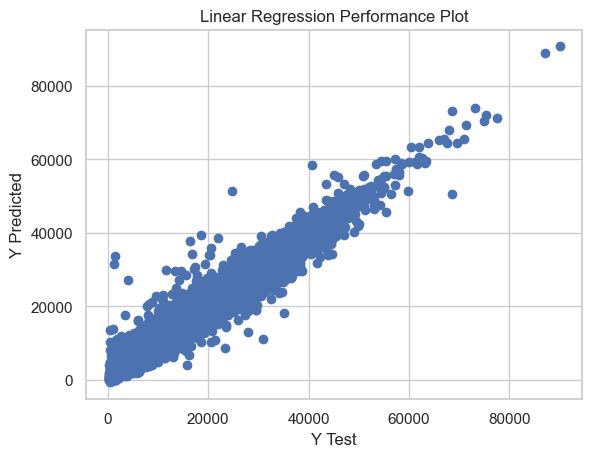

In [128]:
plt.scatter(x = y_test , y = lr_pred)
plt.title('Linear Regression Performance Plot')
plt.xlabel('Y Test')
plt.ylabel('Y Predicted')

Text(0, 0.5, 'Residuals')

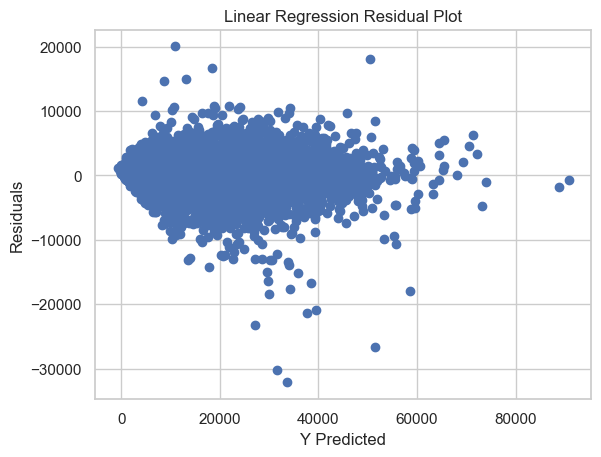

In [129]:
residuals = y_test - lr_pred

plt.scatter(x = lr_pred , y = residuals)
plt.title('Linear Regression Residual Plot')
plt.xlabel('Y Predicted')
plt.ylabel('Residuals')

#### The model has not fully captured the underlying patterns in the data

In [130]:
mets_lr = [mae(y_test, lr_pred), mape(y_test, lr_pred), mse(y_test, lr_pred), math.sqrt(mse(y_test, lr_pred)), r2(y_test, lr_pred), aic_lr, bic_lr]

### Ridge Regression

In [131]:
param_grid_rr = {
    'alpha': [0.1, 0.5, 1, 2, 5, 10],
    'fit_intercept': [0, 1],
}

rr = Ridge(random_state = 36, max_iter = 2000)

grid_rr = GridSearchCV(estimator = rr, param_grid = param_grid_rr, cv=5, verbose=2, n_jobs=-1)

grid_rr.fit(X_train, y_train)

print("Best parameters for Ridge Net:", grid_rr.best_params_)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best parameters for Ridge Net: {'alpha': 0.5, 'fit_intercept': 1}


In [132]:
param_grid_rr = {
    'alpha': [0.8, 0.9, 1, 1.2, 1.3, 1.4, 1.5]
}

grid_rr = GridSearchCV(estimator = rr, param_grid = param_grid_rr, cv=5, verbose=2, n_jobs=-1)
 
grid_rr.fit(X_train, y_train)

print("Best parameters for Ridge Net:", grid_rr.best_params_)

Fitting 5 folds for each of 7 candidates, totalling 35 fits
Best parameters for Ridge Net: {'alpha': 0.8}


In [133]:
print('Model performance on training data: ', grid_rr.score(X_train,y_train))
print('Model performance on test data: ', grid_rr.score(X_test,y_test))

Model performance on training data:  0.9675491728451103
Model performance on test data:  0.9668536314319838


In [134]:
rr = Ridge(alpha = 1.3, random_state = 36)
rr.fit(X_train, y_train)
rr_pred = rr.predict(X_test)

In [135]:
print('Mean Absolute Error for ridge regression: ', mae(y_test, rr_pred))
print('Mean Absolute Persentage Error for ridge regression: ', mape(y_test, rr_pred))
print('Mean Squared Error for ridge regression: ', mse(y_test, rr_pred))
print('Root Mean Squared Error for ridge regression: ', math.sqrt(mse(y_test, rr_pred)))
print('R-squared value for ridge regression: ', r2(y_test, rr_pred))

Mean Absolute Error for ridge regression:  1288.1191888034894
Mean Absolute Persentage Error for ridge regression:  0.13065321130945362
Mean Squared Error for ridge regression:  3654253.847414249
Root Mean Squared Error for ridge regression:  1911.6102760275821
R-squared value for ridge regression:  0.9668536328804178


In [136]:
n = X_train.shape[1]
alpha = 1.3

aic_rr = n * np.log(mse(y_test, rr_pred)) + 2 * alpha * np.sum(rr.coef_ ** 2)
bic_rr = n * np.log(mse(y_test, rr_pred)) + alpha * np.sum(rr.coef_ ** 2) * np.log(X_train.shape[0])

print("AIC for ridge regression:", aic_rr)
print("BIC for ridge regression:", bic_rr)

AIC for ridge regression: 269740357.8598486
BIC for ridge regression: 1492037495.1335075


Text(0, 0.5, 'Y Predicted')

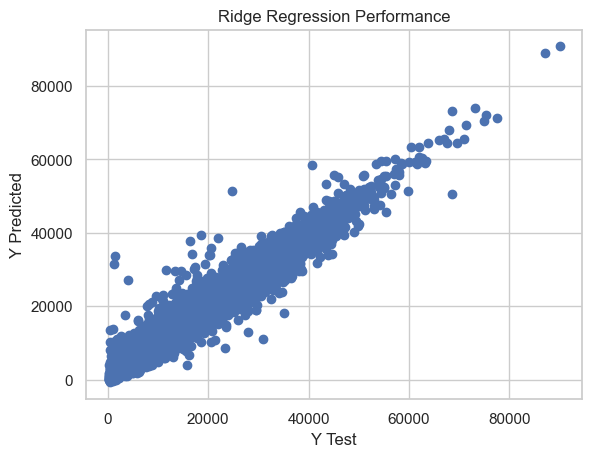

In [137]:
plt.scatter(x = y_test , y = rr_pred)
plt.title('Ridge Regression Performance')
plt.xlabel('Y Test')
plt.ylabel('Y Predicted')

Text(0, 0.5, 'Residuals')

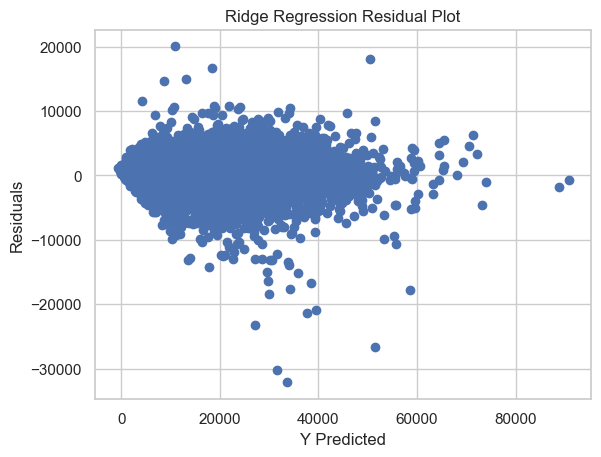

In [138]:
residuals = y_test - rr_pred

plt.scatter(x = rr_pred , y = residuals)
plt.title('Ridge Regression Residual Plot')
plt.xlabel('Y Predicted')
plt.ylabel('Residuals')

#### The model has not fully captured the underlying patterns in the data

In [139]:
mets_rr = [mae(y_test, rr_pred), mape(y_test, rr_pred), mse(y_test, rr_pred), math.sqrt(mse(y_test, rr_pred)), r2(y_test, rr_pred), aic_rr, bic_rr]

### Lasso Regression

In [140]:
param_grid_lar = {
    'alpha': [0.1, 0.5, 1, 2, 5, 10],
    'fit_intercept': [0, 1],
    'selection' : ['cyclic', 'random'],
    'warm_start' : [0, 1]
}

lar = Lasso(random_state = 36, max_iter = 2000)

grid_lar = GridSearchCV(estimator = lar, param_grid = param_grid_lar, cv=5, verbose=2, n_jobs=-1)

grid_lar.fit(X_train, y_train)

print("Best parameters for Lasso Net:", grid_lar.best_params_)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
Best parameters for Lasso Net: {'alpha': 2, 'fit_intercept': 1, 'selection': 'random', 'warm_start': 0}


In [141]:
%time
param_grid_lar = {
    'alpha': [0.6, 0.07, 0.08, 0.09, 0.1, 0.2, 0.3, 0.4]
}

lar = Lasso(selection = 'random', random_state = 36, max_iter = 2000)

grid_lar = GridSearchCV(estimator = lar, param_grid = param_grid_lar, cv=5, verbose=2, n_jobs=-1)
 
grid_lar.fit(X_train, y_train)

print("Best parameters for Lasso Net:", grid_lar.best_params_)

CPU times: total: 0 ns
Wall time: 0 ns
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters for Lasso Net: {'alpha': 0.6}


In [142]:
print('Model performance on training data: ', grid_lar.score(X_train,y_train))
print('Model performance on test data: ', grid_lar.score(X_test,y_test))

Model performance on training data:  0.9675491341080447
Model performance on test data:  0.966853841946757


In [143]:
lar = Lasso(alpha = 0.07, selection = 'random', random_state = 36)
lar.fit(X_train, y_train)
lar_pred = lar.predict(X_test)

In [144]:
print('Mean Absolute Error for lasso regression: ', mae(y_test, lar_pred))
print('Mean Absolute Persentage Error for lasso regression: ', mape(y_test, lar_pred))
print('Mean Squared Error for lasso regression: ', mse(y_test, lar_pred))
print('Root Mean Squared Error for lasso regression: ', math.sqrt(mse(y_test, lar_pred)))
print('R-squared value for lasso regression: ', r2(y_test, lar_pred))

Mean Absolute Error for lasso regression:  1288.1145219896175
Mean Absolute Persentage Error for lasso regression:  0.1306517523388472
Mean Squared Error for lasso regression:  3654251.5805456624
Root Mean Squared Error for lasso regression:  1911.6096831062723
R-squared value for lasso regression:  0.9668536534423332


In [145]:
n = X_train.shape[1]
alpha = 0.07

aic_lar = n * np.log(mse(y_test, lar_pred)) + 2 * alpha * np.sum(np.abs(lar.coef_))
bic_lar = n * np.log(mse(y_test, lar_pred)) + alpha * np.sum(np.abs(lar.coef_)) * np.log(X_train.shape[0])

print("AIC for lasso regression:", aic_lar)
print("BIC for lasso regression:", bic_lar)

AIC for lasso regression: 1626.3461500975113
BIC for lasso regression: 8516.61879749064


Text(0, 0.5, 'Y Predicted')

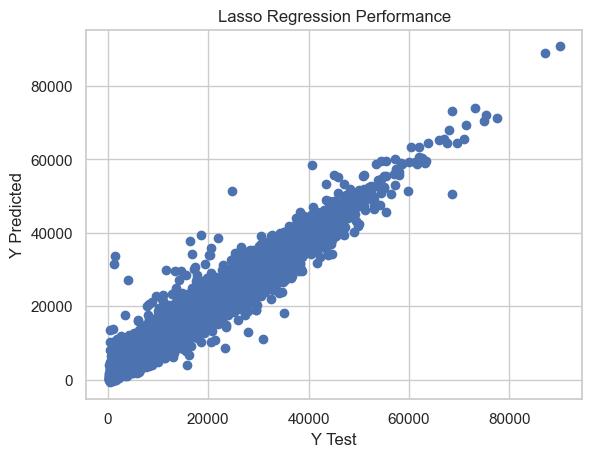

In [146]:
plt.scatter(x = y_test , y = lar_pred)
plt.title('Lasso Regression Performance')
plt.xlabel('Y Test')
plt.ylabel('Y Predicted')

Text(0, 0.5, 'Residuals')

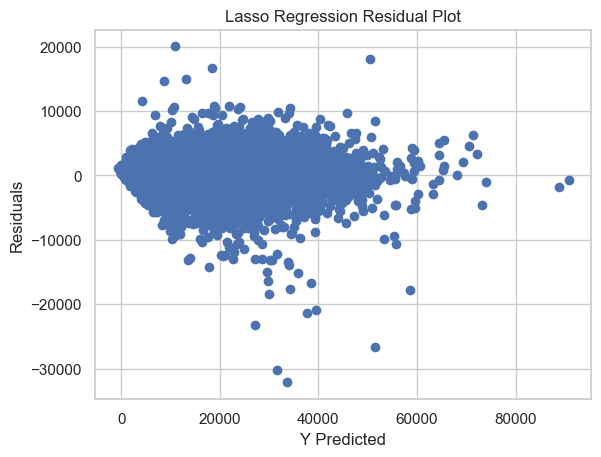

In [147]:
residuals = y_test - np.reshape(lar_pred, (-1,1))

plt.scatter(x = lar_pred , y = residuals)
plt.title('Lasso Regression Residual Plot')
plt.xlabel('Y Predicted')
plt.ylabel('Residuals')

In [148]:
mets_lar = [mae(y_test, lar_pred), mape(y_test, lar_pred), mse(y_test, lar_pred), math.sqrt(mse(y_test, lar_pred)), r2(y_test, lar_pred), aic_lar, bic_lar]

### Elastic Net Regression

In [149]:
param_grid_en = {
    'alpha': [0.1, 0.5, 1, 2, 5, 10],
    'l1_ratio': [0.1, 0.5, 1],
    'fit_intercept': [0, 1],
    'selection' : ['cyclic', 'random'],
    'warm_start' : [0, 1]
}

en = ElasticNet(random_state = 36, max_iter = 2000)

grid_en = GridSearchCV(estimator = en, param_grid = param_grid_en, cv=5, verbose=2, n_jobs=-1)

grid_en.fit(X_train, y_train)

print("Best parameters for Elastic Net:", grid_en.best_params_)

Fitting 5 folds for each of 144 candidates, totalling 720 fits
Best parameters for Elastic Net: {'alpha': 2, 'fit_intercept': 1, 'l1_ratio': 1, 'selection': 'random', 'warm_start': 0}


In [150]:
param_grid_en = {
    'alpha': [0.6, 0.07, 0.08, 0.09, 0.1, 0.2, 0.3, 0.4],
    'l1_ratio': [0.6, 0.7, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4, 1.5, 2],
}

en = ElasticNet(selection = 'random', random_state = 36, max_iter = 2000)

grid_en = GridSearchCV(estimator = en, param_grid = param_grid_en, cv=5, verbose=2, n_jobs=-1)

grid_en.fit(X_train, y_train)

print("Best parameters for Elastic Net:", grid_en.best_params_)

Fitting 5 folds for each of 88 candidates, totalling 440 fits
Best parameters for Elastic Net: {'alpha': 0.6, 'l1_ratio': 1}


In [151]:
print('Model performance on training data: ', grid_en.score(X_train,y_train))
print('Model performance on test data: ', grid_en.score(X_test,y_test))

Model performance on training data:  0.9675491341080447
Model performance on test data:  0.966853841946757


In [152]:
er = ElasticNet(alpha = 0.07, l1_ratio = 1, selection = 'random', random_state = 36)
er.fit(X_train, y_train)
er_pred = er.predict(X_test)

In [153]:
print('Mean Absolute Error for elastic net regression: ', mae(y_test, er_pred))
print('Mean Absolute Persentage Error for elastic net regression: ', mape(y_test, er_pred))
print('Mean Squared Error for elastic net regression: ', mse(y_test, er_pred))
print('Root Mean Squared Error for elastic net regression: ', math.sqrt(mse(y_test, er_pred)))
print('R-squared value for elastic net regression: ', r2(y_test, er_pred))

Mean Absolute Error for elastic net regression:  1288.1145219896175
Mean Absolute Persentage Error for elastic net regression:  0.1306517523388472
Mean Squared Error for elastic net regression:  3654251.5805456624
Root Mean Squared Error for elastic net regression:  1911.6096831062723
R-squared value for elastic net regression:  0.9668536534423332


In [154]:
n = X_train.shape[1]
alpha = 0.07
l1_ratio = 1

aic_er = n * np.log(mse(y_test, er_pred)) + 2 * (alpha * np.sum(np.abs(er.coef_)) + l1_ratio * np.sum(er.coef_ ** 2))
bic_er = n * np.log(mse(y_test, er_pred)) + (alpha * np.sum(np.abs(er.coef_)) + l1_ratio * np.sum(er.coef_ ** 2)) * np.log(X_train.shape[0])

print("AIC for elastic net regression:", aic_er)
print("BIC for elastic net regression:", bic_er)

AIC for elastic net regression: 207505228.01398957
BIC for elastic net regression: 1147790984.109459


Text(0, 0.5, 'Y Predicted')

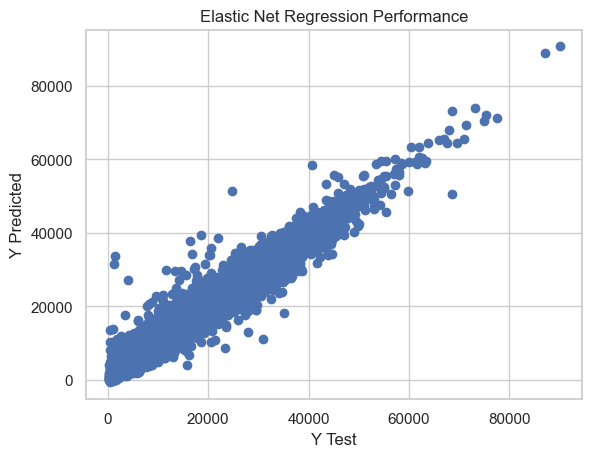

In [155]:
plt.scatter(x = y_test , y = er_pred)
plt.title('Elastic Net Regression Performance')
plt.xlabel('Y Test')
plt.ylabel('Y Predicted')

Text(0, 0.5, 'Residuals')

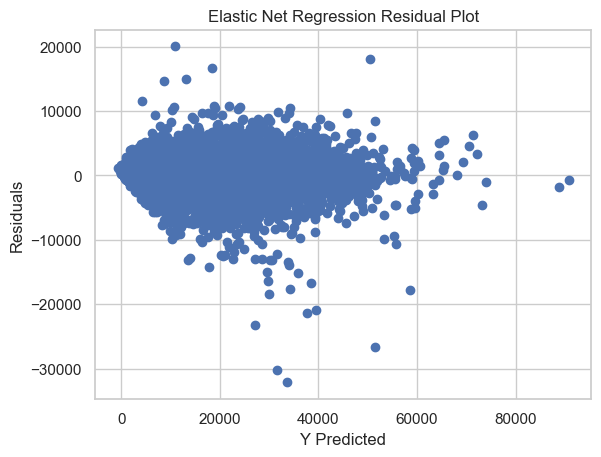

In [156]:
residuals = y_test - np.reshape(er_pred, (-1,1))

plt.scatter(x = er_pred , y = residuals)
plt.title('Elastic Net Regression Residual Plot')
plt.xlabel('Y Predicted')
plt.ylabel('Residuals')

In [157]:
mets_er = [mae(y_test, er_pred), mape(y_test, er_pred), mse(y_test, er_pred), math.sqrt(mse(y_test, er_pred)), r2(y_test, er_pred), aic_er, bic_er]

### Random Forests Regression

param_grid_rf = {
    'max_depth': [10, 15, 20],
    'max_features': [0.5, 0.6, 0.7],
    'max_samples': [0.6, 0.7, 0.8]
}

rf = rfr(random_state=42, n_estimators=400)

grid_rf = GridSearchCV(estimator = rf, param_grid = param_grid_rf, cv=3, verbose=2, n_jobs=-1)
 
grid_rf.fit(X_train, y_train)

print("Best parameters for Random Forest Regressor:", grid_rf.best_params_)

param_grid_rf = {
    'max_depth': [13, 14, 15, 16, 17]
}

rf = rfr(max_features = 0.6, max_samples = 0.7, random_state=42, n_estimators=400)
    
grid_rf = GridSearchCV(estimator = rf, param_grid = param_grid_rf, cv=3, verbose=2, n_jobs=-1)
 
grid_rf.fit(X_train, y_train)

print("Best parameters for Random Forest Regressor:", grid_rf.best_params_)

In [158]:
rf = rfr(max_depth = 15, max_features = 0.6, max_samples = 0.7, random_state=42, n_estimators=400)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

In [159]:
print('Mean Absolute Error for random forest regression: ', mae(y_test, rf_pred))
print('Mean Absolute Persentage Error for random forest regression: ', mape(y_test, rf_pred))
print('Mean Squared Error for random forest regression: ', mse(y_test, rf_pred))
print('Root Mean Squared Error for random forest regression: ', math.sqrt(mse(y_test, rf_pred)))
print('R-squared value for random forest regression: ', r2(y_test, rf_pred))

Mean Absolute Error for random forest regression:  1184.5557913678815
Mean Absolute Persentage Error for random forest regression:  0.12207749167672453
Mean Squared Error for random forest regression:  3179151.5904896725
Root Mean Squared Error for random forest regression:  1783.0175519297818
R-squared value for random forest regression:  0.9711631073955798


In [160]:
n = X_train.shape[1] 
max_depth = 15
max_features = 0.6
n_estimators = 400

aic_rf = n * np.log(mse(y_test, rf_pred)) + 2 * (max_depth + max_features + n_estimators)
bic_rf = n * np.log(mse(y_test, rf_pred)) + (max_depth + max_features + n_estimators) * np.log(X_train.shape[0])

print("AIC for random forests regression:", aic_rf)
print("BIC for random forests regression:", bic_rf)

AIC for random forests regression: 936.0048744660164
BIC for random forests regression: 4702.492718484301


Text(0, 0.5, 'Y Predicted')

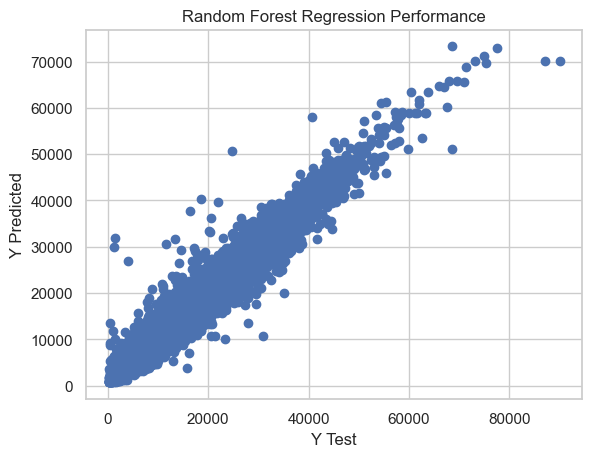

In [161]:
plt.scatter(x = y_test , y = rf_pred)
plt.title('Random Forest Regression Performance')
plt.xlabel('Y Test')
plt.ylabel('Y Predicted')

Text(0, 0.5, 'Residuals')

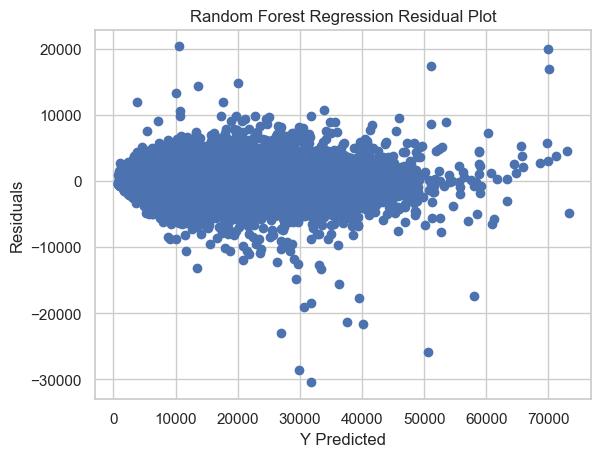

In [162]:
residuals = y_test - np.reshape(rf_pred, (-1,1))


plt.scatter(x = rf_pred , y = residuals)
plt.title('Random Forest Regression Residual Plot')
plt.xlabel('Y Predicted')
plt.ylabel('Residuals')

In [163]:
mets_rf = [mae(y_test, rf_pred), mape(y_test, rf_pred), mse(y_test, rf_pred), math.sqrt(mse(y_test, rf_pred)), r2(y_test, rf_pred), aic_rf, bic_rf]

### XGBoost

param_grid_grb = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.2, 0.4, 0.6],
    'max_depth': [2, 4, 6],
    'max_features' : [0.3, 0.6, 0.9]
}

grb = xgb(subsample = 0.8, n_iter_no_change=20, loss='huber')

grid_grb = GridSearchCV(estimator = grb, param_grid = param_grid_grb, cv=5, verbose=2, n_jobs=-1)

grid_grb.fit(X_train, y_train)

print("Best parameters for Gradient Boosting Regressor:", grid_grb.best_params_)

param_grid_grb = {
    'n_estimators': [250, 300, 350],
    'learning_rate': [0.1, 0.2, 0.3],
    'max_depth': [5, 6, 7],
    'max_features' : [0.8, 0.9, 1]
}

grb = xgb(subsample = 0.8, n_iter_no_change=20, loss='huber')

grid_grb = GridSearchCV(estimator = grb, param_grid = param_grid_grb, cv=5, verbose=2, n_jobs=-1)

grid_grb.fit(X_train, y_train)

print("Best parameters for Gradient Boosting Regressor:", grid_grb.best_params_)

param_grid_grb = {
    'n_estimators': [325, 350, 375, 400]
}

grb = xgb(learning_rate = 0.2, max_depth = 6, max_features = 0.9, subsample = 0.8, n_iter_no_change=20, loss='huber')

grid_grb = GridSearchCV(estimator = grb, param_grid = param_grid_grb, cv=5, verbose=2, n_jobs=-1)

grid_grb.fit(X_train, y_train)

print("Best parameters for Gradient Boosting Regressor:", grid_grb.best_params_)

In [164]:
gradboost = xgb(n_estimators = 375, learning_rate = 0.2, max_depth = 6, max_features = 0.9, subsample = 0.8, n_iter_no_change=20, loss='huber')
gradboost.fit(X_train, y_train)
gradboost_pred = gradboost.predict(X_test)

In [165]:
print('Mean Absolute Error for extreme gradient boosting: ', mae(y_test, gradboost_pred))
print('Mean Absolute Persentage Error for extreme gradient boosting: ', mape(y_test, gradboost_pred))
print('Mean Squared Error for extreme gradient boosting: ', mse(y_test, gradboost_pred))
print('Root Mean Squared Error for extreme gradient boosting: ', math.sqrt(mse(y_test, gradboost_pred)))
print('R-squared value for extreme gradient boosting: ', r2(y_test, gradboost_pred))

Mean Absolute Error for extreme gradient boosting:  1139.4097223909944
Mean Absolute Persentage Error for extreme gradient boosting:  0.11599248754276983
Mean Squared Error for extreme gradient boosting:  2971039.3778173313
Root Mean Squared Error for extreme gradient boosting:  1723.6703216732983
R-squared value for extreme gradient boosting:  0.9730508152810587


In [166]:
n = X_train.shape[1]
n_estimators = 375
max_depth = 6

aic_xgb = n * np.log(mse(y_test, gradboost_pred)) + 2 * (n_estimators * max_depth)
bic_xgb = n * np.log(mse(y_test, gradboost_pred)) + (n_estimators * max_depth) * np.log(X_train.shape[0])

print("AIC for gradient boosting regression:", aic_xgb)
print("BIC for gradient boosting regression:", bic_xgb)

AIC for gradient boosting regression: 4604.33095685893
BIC for gradient boosting regression: 24995.566878517115


Text(0, 0.5, 'Y Predicted')

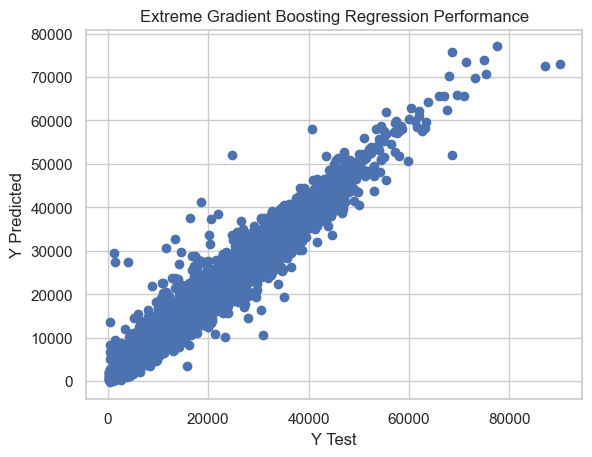

In [167]:
plt.scatter(x = y_test , y = gradboost_pred)
plt.title('Extreme Gradient Boosting Regression Performance')
plt.xlabel('Y Test')
plt.ylabel('Y Predicted')

Text(0, 0.5, 'Residuals')

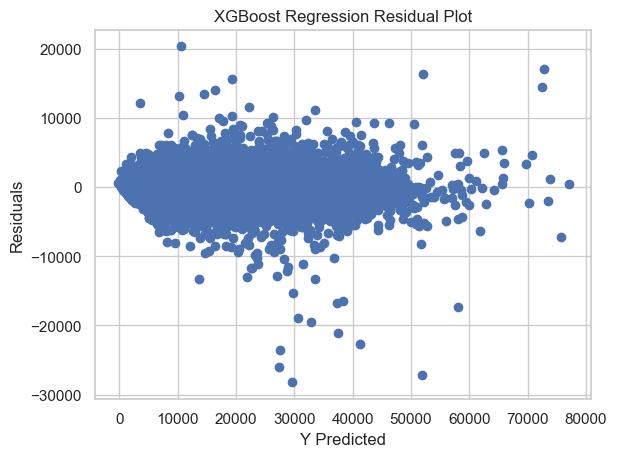

In [168]:
residuals = y_test - np.reshape(gradboost_pred, (-1,1))

plt.scatter(x = gradboost_pred , y = residuals)
plt.title('XGBoost Regression Residual Plot')
plt.xlabel('Y Predicted')
plt.ylabel('Residuals')

In [169]:
mets_xgb = [mae(y_test, gradboost_pred), mape(y_test, gradboost_pred), mse(y_test, gradboost_pred), math.sqrt(mse(y_test, gradboost_pred)), r2(y_test, gradboost_pred), aic_xgb, bic_xgb]

### K Nearest Neighbors

param_grid_grb = {
    'weights': ['uniform', 'distance'],
    'metric': ['cosine', 'euclidean', 'mahalanobis', 'minkowski'],
}

knn = knnr(n_neighbors = 5)

grid_knn = GridSearchCV(estimator = knn, param_grid = param_grid_grb, cv=5, verbose=2, n_jobs=-1)

grid_knn.fit(X_train, y_train)

print("Best parameters for Gradient Boosting Regressor:", grid_knn.best_params_)

Text(0, 0.5, 'Testing R2')

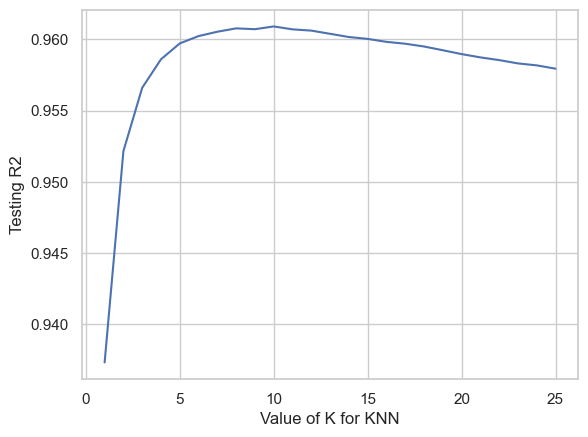

In [170]:
k_range = range(1, 26)
scores = {}
scores_list = []

for k in k_range:
    knn = knnr(n_neighbors = k, metric = 'euclidean', weights = 'uniform')
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores[k] = r2(y_test, y_pred)
    scores_list.append(r2(y_test, y_pred))
    
plt.plot(k_range, scores_list)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing R2')

In [171]:
knn = knnr(n_neighbors = 15, metric = 'euclidean', weights = 'uniform')
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)

In [172]:
print('Mean Absolute Error for k nearest neighbor resourses: ', mae(y_test, knn_pred))
print('Mean Absolute Percentage Error for k nearest neighbor resourses: ', mape(y_test, knn_pred))
print('Mean Squared Error for k nearest neighbor resourses: ', mse(y_test, knn_pred))
print('Root Mean Squared Error for k nearest neighbor resourses: ', math.sqrt(mse(y_test, knn_pred)))
print('R-squared value for k nearest neighbor resourses: ', r2(y_test, knn_pred))

Mean Absolute Error for k nearest neighbor resourses:  1461.5096575847413
Mean Absolute Percentage Error for k nearest neighbor resourses:  0.16822634872696673
Mean Squared Error for k nearest neighbor resourses:  4406844.877711166
Root Mean Squared Error for k nearest neighbor resourses:  2099.248645994839
R-squared value for k nearest neighbor resourses:  0.9600271616984069


In [173]:
n = X_train.shape[1]
k = 15

aic_knn = n * np.log(mse(y_test, knn_pred)) + 2 * k
bic_knn = n * np.log(mse(y_test, knn_pred)) + k * np.log(X_train.shape[0])

print("AIC for k nearest neighbors regression:", aic_knn)
print("BIC for k nearest neighbors regression:", bic_knn)

AIC for k nearest neighbors regression: 137.09068680896246
BIC for k nearest neighbors regression: 273.03225962001704


Text(0, 0.5, 'Y Predicted')

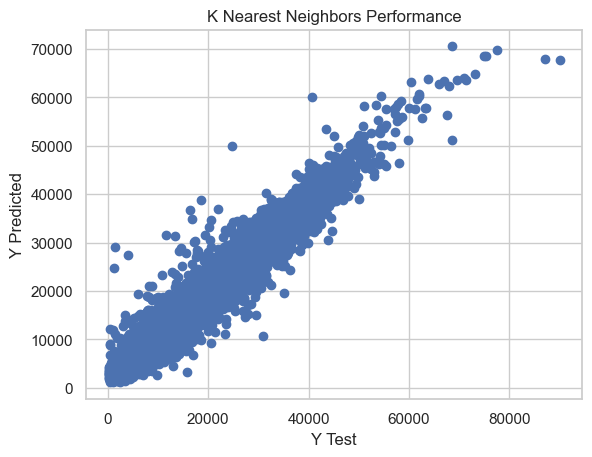

In [174]:
plt.scatter(x = y_test , y = knn_pred)
plt.title('K Nearest Neighbors Performance')
plt.xlabel('Y Test')
plt.ylabel('Y Predicted')

Text(0, 0.5, 'Residuals')

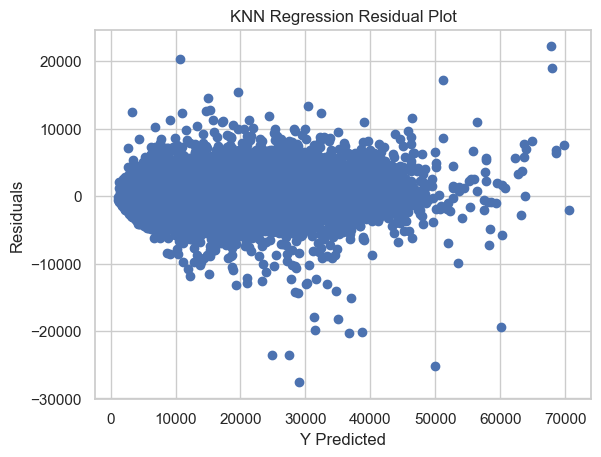

In [175]:
residuals = y_test - np.reshape(knn_pred, (-1,1))

plt.scatter(x = knn_pred , y = residuals)
plt.title('KNN Regression Residual Plot')
plt.xlabel('Y Predicted')
plt.ylabel('Residuals')

In [176]:
mets_knn = [mae(y_test, knn_pred), mape(y_test, knn_pred), mse(y_test, knn_pred), math.sqrt(mse(y_test, knn_pred)), r2(y_test, knn_pred), aic_knn, bic_knn]

### Results

In [177]:
evaluation_metrics = {'Linear Regression' : mets_lr,
                      'Ridge Regression' : mets_rr,
                      'Lasso Regression' : mets_lar,
                      'Elastic Net Regression' : mets_er,
                      'Random Forests Regression' : mets_rf,
                      'Extreme Gradient Boosting  Regression' : mets_xgb,
                      'K Nearest Neighbors Regression' : mets_knn}

In [178]:
metrics_slim = pd.DataFrame(evaluation_metrics, index=['MAE', 'MAPE', 'MSE', 'RMSE', 'R2', 'AIC', 'BIC'])

metrics_slim

,Linear Regression,Ridge Regression,Lasso Regression,Elastic Net Regression,Random Forests Regression,Extreme Gradient Boosting Regression,K Nearest Neighbors Regression
MAE,1.288115e+03,1.288119e+03,1.288115e+03,1.288115e+03,1.184556e+03,1.139410e+03,1.461510e+03
MAPE,1.306524e-01,1.306532e-01,1.306518e-01,1.306518e-01,1.220775e-01,1.159925e-01,1.682263e-01
MSE,3.654254e+06,3.654254e+06,3.654252e+06,3.654252e+06,3.179152e+06,2.971039e+06,4.406845e+06
RMSE,1.911610e+03,1.911610e+03,1.911610e+03,1.911610e+03,1.783018e+03,1.723670e+03,2.099249e+03
R2,9.668536e-01,9.668536e-01,9.668537e-01,9.668537e-01,9.711631e-01,9.730508e-01,9.600272e-01
AIC,1.057798e+02,2.697404e+08,1.626346e+03,2.075052e+08,9.360049e+02,4.604331e+03,1.370907e+02
BIC,1.832192e+02,1.492037e+09,8.516619e+03,1.147791e+09,4.702493e+03,2.499557e+04,2.730323e+02


In [179]:
min_values = metrics_slim.idxmin(axis=1)

lowest_values = metrics_slim.min(axis=1)

result_df_slim = pd.DataFrame({'Lowest_Model': min_values, 'Lowest_Value': lowest_values})

result_df_slim

,Lowest_Model,Lowest_Value
MAE,Extreme Gradient Boosting Regression,1.139410e+03
MAPE,Extreme Gradient Boosting Regression,1.159925e-01
MSE,Extreme Gradient Boosting Regression,2.971039e+06
RMSE,Extreme Gradient Boosting Regression,1.723670e+03
R2,K Nearest Neighbors Regression,9.600272e-01
AIC,Linear Regression,1.057798e+02
BIC,Linear Regression,1.832192e+02


### Data including 'Outliers'

In [180]:
X = cp_fe_s_df.drop('sellingprice', axis = 1)
y = cp_fe_s_df['sellingprice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

print('Dimension of X_train:', X_train.shape)
print('Dimension of y_train:', y_train.shape)
print('Dimension of X_test:', X_test.shape)
print('Dimension of y_test:', y_test.shape)

Dimension of X_train: (70836, 18)
Dimension of y_train: (70836,)
Dimension of X_test: (23613, 18)
Dimension of y_test: (23613,)


### Linear Regression

In [181]:
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)

In [182]:
print('Mean Absolute Error for linear regression: ', mae(y_test, lr_pred))
print('Mean Absolute Persentage Error for linear regression: ', mape(y_test, lr_pred))
print('Mean Squared Error for linear regression: ', mse(y_test, lr_pred))
print('Root Mean Squared Error for linear regression: ', math.sqrt(mse(y_test, lr_pred)))
print('R-squared value for linear regression: ', r2(y_test, lr_pred))

Mean Absolute Error for linear regression:  0.11043042106491809
Mean Absolute Persentage Error for linear regression:  1.0415005891326132
Mean Squared Error for linear regression:  0.027827347024039956
Root Mean Squared Error for linear regression:  0.16681530812260592
R-squared value for linear regression:  0.972780055641692


In [183]:
n = X_train.shape[1]

aic_lr = n * np.log(mse(y_test, lr_pred))
bic_lr = n * np.log(mse(y_test, lr_pred)) + n * np.log(X_train.shape[0])

print("AIC for linear regression:", aic_lr)
print("BIC for linear regression:", bic_lr)

AIC for linear regression: -64.47124864631535
BIC for linear regression: 136.5549586042011


Text(0, 0.5, 'Y Predicted')

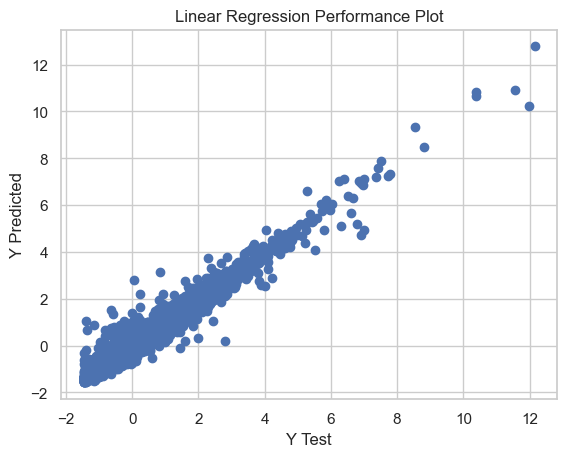

In [184]:
plt.scatter(x = y_test , y = lr_pred)
plt.title('Linear Regression Performance Plot')
plt.xlabel('Y Test')
plt.ylabel('Y Predicted')

Text(0, 0.5, 'Residuals')

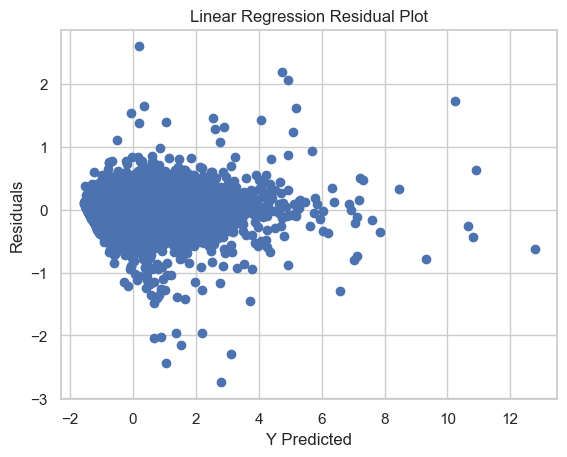

In [185]:
residuals = y_test - lr_pred

plt.scatter(x = lr_pred , y = residuals)
plt.title('Linear Regression Residual Plot')
plt.xlabel('Y Predicted')
plt.ylabel('Residuals')

In [186]:
mets_lr = [mae(y_test, lr_pred), mape(y_test, lr_pred), mse(y_test, lr_pred), math.sqrt(mse(y_test, lr_pred)), r2(y_test, lr_pred), aic_lr, bic_lr]

### Ridge Regression

In [187]:
rr = Ridge(alpha = 1.3, random_state = 36)
rr.fit(X_train, y_train)
rr_pred = rr.predict(X_test)

In [188]:
print('Mean Absolute Error for ridge regression: ', mae(y_test, rr_pred))
print('Mean Absolute Persentage Error for ridge regression: ', mape(y_test, rr_pred))
print('Mean Squared Error for ridge regression: ', mse(y_test, rr_pred))
print('Root Mean Squared Error for ridge regression: ', math.sqrt(mse(y_test, rr_pred)))
print('R-squared value for ridge regression: ', r2(y_test, rr_pred))

Mean Absolute Error for ridge regression:  0.11043234197824481
Mean Absolute Persentage Error for ridge regression:  1.0415875730968407
Mean Squared Error for ridge regression:  0.027827622304131387
Root Mean Squared Error for ridge regression:  0.16681613322497132
R-squared value for ridge regression:  0.9727797863702892


In [189]:
n = X_train.shape[1]
alpha = 1.3

aic_rr = n * np.log(mse(y_test, rr_pred)) + 2 * alpha * np.sum(rr.coef_ ** 2)
bic_rr = n * np.log(mse(y_test, rr_pred)) + alpha * np.sum(rr.coef_ ** 2) * np.log(X_train.shape[0])

print("AIC for ridge regression:", aic_rr)
print("BIC for ridge regression:", bic_rr)

AIC for ridge regression: -62.023525700826916
BIC for ridge regression: -50.80382989375054


Text(0, 0.5, 'Y Predicted')

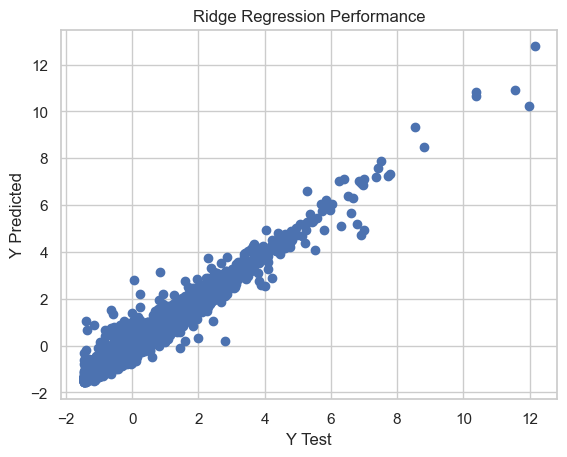

In [190]:
plt.scatter(x = y_test , y = rr_pred)
plt.title('Ridge Regression Performance')
plt.xlabel('Y Test')
plt.ylabel('Y Predicted')

Text(0, 0.5, 'Residuals')

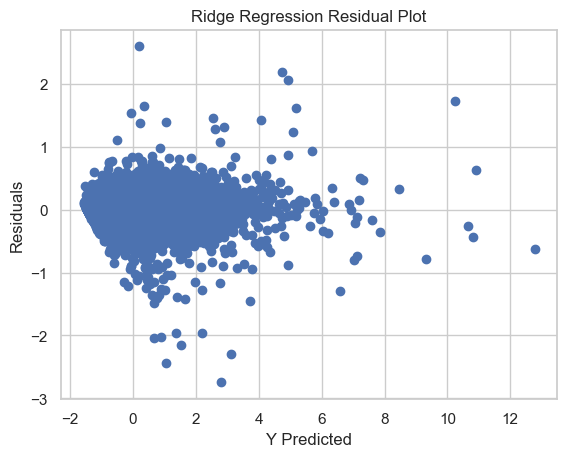

In [191]:
residuals = y_test - rr_pred

plt.scatter(x = rr_pred , y = residuals)
plt.title('Ridge Regression Residual Plot')
plt.xlabel('Y Predicted')
plt.ylabel('Residuals')

In [192]:
mets_rr = [mae(y_test, rr_pred), mape(y_test, rr_pred), mse(y_test, rr_pred), math.sqrt(mse(y_test, rr_pred)), r2(y_test, rr_pred), aic_rr, bic_rr]

### Lasso Regression

In [193]:
lar = Lasso(alpha = 0.07, selection = 'random', random_state = 36)
lar.fit(X_train, y_train)
lar_pred = lar.predict(X_test)

In [194]:
print('Mean Absolute Error for lasso regression: ', mae(y_test, lar_pred))
print('Mean Absolute Persentage Error for lasso regression: ', mape(y_test, lar_pred))
print('Mean Squared Error for lasso regression: ', mse(y_test, lar_pred))
print('Root Mean Squared Error for lasso regression: ', math.sqrt(mse(y_test, lar_pred)))
print('R-squared value for lasso regression: ', r2(y_test, lar_pred))

Mean Absolute Error for lasso regression:  0.13092239268327116
Mean Absolute Persentage Error for lasso regression:  0.975803523518721
Mean Squared Error for lasso regression:  0.035634745268390174
Root Mean Squared Error for lasso regression:  0.18877167496314212
R-squared value for lasso regression:  0.9651430737328248


In [195]:
n = X_train.shape[1]
alpha = 0.07

aic_lar = n * np.log(mse(y_test, lar_pred)) + 2 * alpha * np.sum(np.abs(lar.coef_))
bic_lar = n * np.log(mse(y_test, lar_pred)) + alpha * np.sum(np.abs(lar.coef_)) * np.log(X_train.shape[0])

print("AIC for lasso regression:", aic_lar)
print("BIC for lasso regression:", bic_lar)

AIC for lasso regression: -59.892506353781506
BIC for lasso regression: -59.30891903574759


Text(0, 0.5, 'Y Predicted')

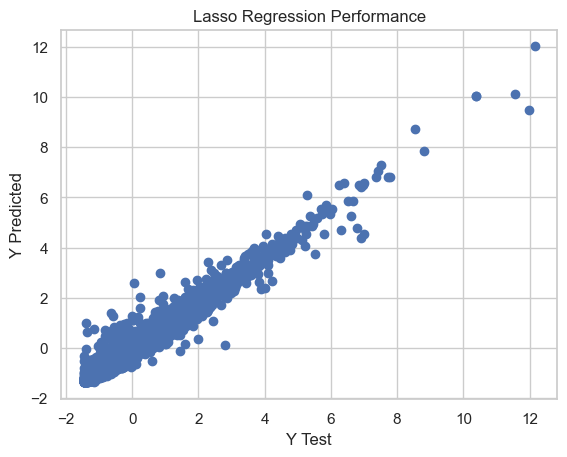

In [196]:
plt.scatter(x = y_test , y = lar_pred)
plt.title('Lasso Regression Performance')
plt.xlabel('Y Test')
plt.ylabel('Y Predicted')

Text(0, 0.5, 'Residuals')

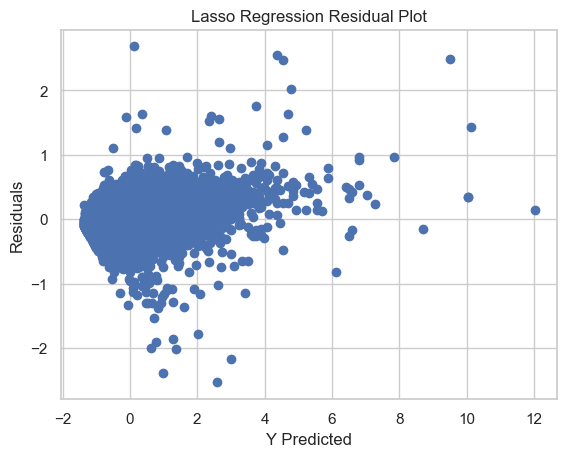

In [197]:
residuals = y_test - lar_pred

plt.scatter(x = lar_pred , y = residuals)
plt.title('Lasso Regression Residual Plot')
plt.xlabel('Y Predicted')
plt.ylabel('Residuals')

In [198]:
mets_lar = [mae(y_test, lar_pred), mape(y_test, lar_pred), mse(y_test, lar_pred), math.sqrt(mse(y_test, lar_pred)), r2(y_test, lar_pred), aic_lar, bic_lar]

### Elastic Net Regression

In [199]:
er = ElasticNet(alpha = 0.07, l1_ratio = 1, selection = 'random', random_state = 36)
er.fit(X_train, y_train)
er_pred = er.predict(X_test)

In [200]:
print('Mean Absolute Error for elastic net regression: ', mae(y_test, er_pred))
print('Mean Absolute Persentage Error for elastic net regression: ', mape(y_test, er_pred))
print('Mean Squared Error for elastic net regression: ', mse(y_test, er_pred))
print('Root Mean Squared Error for elastic net regression: ', math.sqrt(mse(y_test, er_pred)))
print('R-squared value for elastic net regression: ', r2(y_test, er_pred))

Mean Absolute Error for elastic net regression:  0.13092239268327116
Mean Absolute Persentage Error for elastic net regression:  0.975803523518721
Mean Squared Error for elastic net regression:  0.035634745268390174
Root Mean Squared Error for elastic net regression:  0.18877167496314212
R-squared value for elastic net regression:  0.9651430737328248


In [201]:
n = X_train.shape[1]
alpha = 0.07
l1_ratio = 1

aic_er = n * np.log(mse(y_test, er_pred)) + 2 * (alpha * np.sum(np.abs(er.coef_)) + l1_ratio * np.sum(er.coef_ ** 2))
bic_er = n * np.log(mse(y_test, er_pred)) + (alpha * np.sum(np.abs(er.coef_)) + l1_ratio * np.sum(er.coef_ ** 2)) * np.log(X_train.shape[0])

print("AIC for elastic net regression:", aic_er)
print("BIC for elastic net regression:", bic_er)

AIC for elastic net regression: -58.23869952788138
BIC for elastic net regression: -50.07396032086656


Text(0, 0.5, 'Y Predicted')

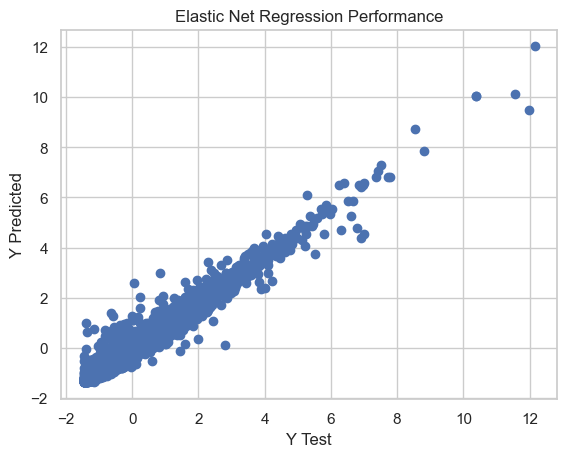

In [202]:
plt.scatter(x = y_test , y = er_pred)
plt.title('Elastic Net Regression Performance')
plt.xlabel('Y Test')
plt.ylabel('Y Predicted')

Text(0, 0.5, 'Residuals')

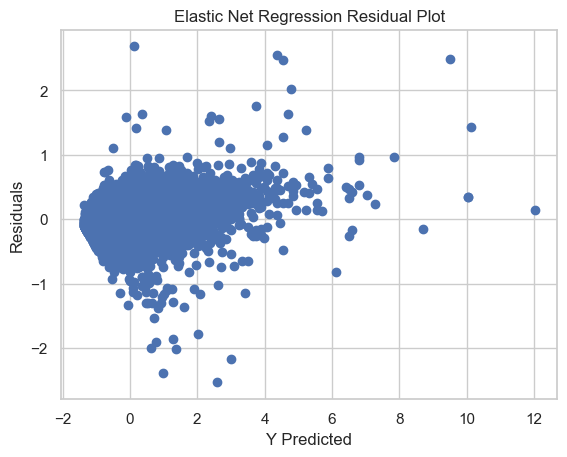

In [203]:
residuals = y_test - er_pred

plt.scatter(x = er_pred , y = residuals)
plt.title('Elastic Net Regression Residual Plot')
plt.xlabel('Y Predicted')
plt.ylabel('Residuals')

In [204]:
mets_er = [mae(y_test, er_pred), mape(y_test, er_pred), mse(y_test, er_pred), math.sqrt(mse(y_test, er_pred)), r2(y_test, er_pred), aic_er, bic_er]

### Random Forests Regressor

In [205]:
rf = rfr(max_depth = 15, max_features = 0.6, max_samples = 0.7, random_state=42, n_estimators=400)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

In [206]:
print('Mean Absolute Error for random forest regression: ', mae(y_test, rf_pred))
print('Mean Absolute Persentage Error for random forest regression: ', mape(y_test, rf_pred))
print('Mean Squared Error for random forest regression: ', mse(y_test, rf_pred))
print('Root Mean Squared Error for random forest regression: ', math.sqrt(mse(y_test, rf_pred)))
print('R-squared value for random forest regression: ', r2(y_test, rf_pred))

Mean Absolute Error for random forest regression:  0.10013611704773083
Mean Absolute Persentage Error for random forest regression:  0.9023921384085539
Mean Squared Error for random forest regression:  0.02409658677751943
Root Mean Squared Error for random forest regression:  0.1552307533239449
R-squared value for random forest regression:  0.9764293825515389


In [207]:
n = X_train.shape[1] 
max_depth = 15
max_features = 0.6
n_estimators = 400

aic_rf = n * np.log(mse(y_test, rf_pred)) + 2 * (max_depth + max_features + n_estimators)
bic_rf = n * np.log(mse(y_test, rf_pred)) + (max_depth + max_features + n_estimators) * np.log(X_train.shape[0])

print("AIC for random forests regression:", aic_rf)
print("BIC for random forests regression:", bic_rf)

AIC for random forests regression: 764.1376686319196
BIC for random forests regression: 4574.409431593843


Text(0, 0.5, 'Y Predicted')

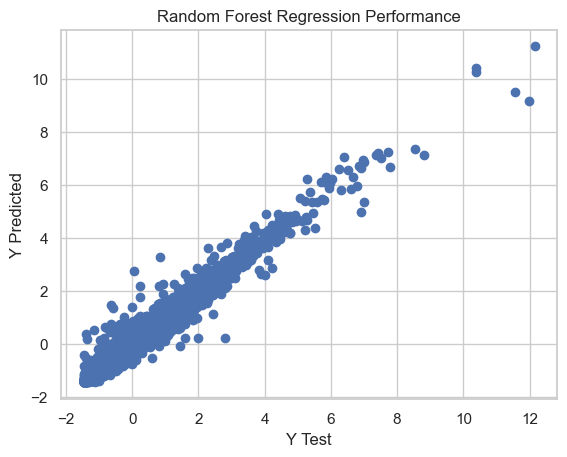

In [208]:
plt.scatter(x = y_test , y = rf_pred)
plt.title('Random Forest Regression Performance')
plt.xlabel('Y Test')
plt.ylabel('Y Predicted')

Text(0, 0.5, 'Residuals')

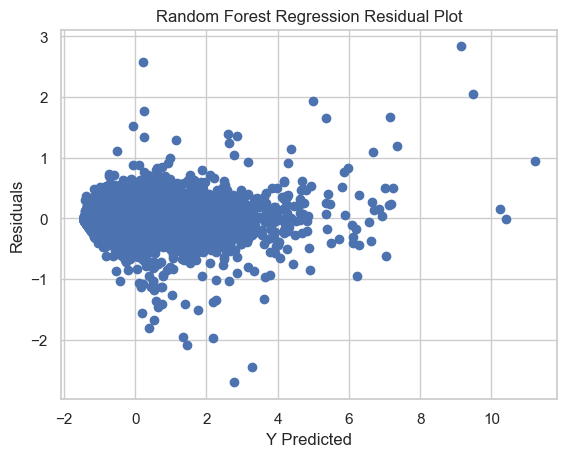

In [209]:
residuals = y_test - rf_pred


plt.scatter(x = rf_pred , y = residuals)
plt.title('Random Forest Regression Residual Plot')
plt.xlabel('Y Predicted')
plt.ylabel('Residuals')

In [210]:
mets_rf = [mae(y_test, rf_pred), mape(y_test, rf_pred), mse(y_test, rf_pred), math.sqrt(mse(y_test, rf_pred)), r2(y_test, rf_pred), aic_rf, bic_rf]

### XGBoost Regression

In [211]:
gradboost = xgb(n_estimators = 375, learning_rate = 0.2, max_depth = 6, max_features = 0.9, subsample = 0.8, n_iter_no_change=20, loss='huber')
gradboost.fit(X_train, y_train)
gradboost_pred = gradboost.predict(X_test)

In [212]:
print('Mean Absolute Error for extreme gradient boosting: ', mae(y_test, gradboost_pred))
print('Mean Absolute Persentage Error for extreme gradient boosting: ', mape(y_test, gradboost_pred))
print('Mean Squared Error for extreme gradient boosting: ', mse(y_test, gradboost_pred))
print('Root Mean Squared Error for extreme gradient boosting: ', math.sqrt(mse(y_test, gradboost_pred)))
print('R-squared value for extreme gradient boosting: ', r2(y_test, gradboost_pred))

Mean Absolute Error for extreme gradient boosting:  0.09532114194966573
Mean Absolute Persentage Error for extreme gradient boosting:  0.836438718776725
Mean Squared Error for extreme gradient boosting:  0.022365345975145435
Root Mean Squared Error for extreme gradient boosting:  0.14955047968878413
R-squared value for extreme gradient boosting:  0.9781228346176213


In [213]:
n = X_train.shape[1]
n_estimators = 375
max_depth = 6

aic_xgb = n * np.log(mse(y_test, gradboost_pred)) + 2 * (n_estimators * max_depth)
bic_xgb = n * np.log(mse(y_test, gradboost_pred)) + (n_estimators * max_depth) * np.log(X_train.shape[0])

print("AIC for gradient boosting regression:", aic_xgb)
print("BIC for gradient boosting regression:", bic_xgb)

AIC for gradient boosting regression: 4431.595633690916
BIC for gradient boosting regression: 25059.871540005468


Text(0, 0.5, 'Y Predicted')

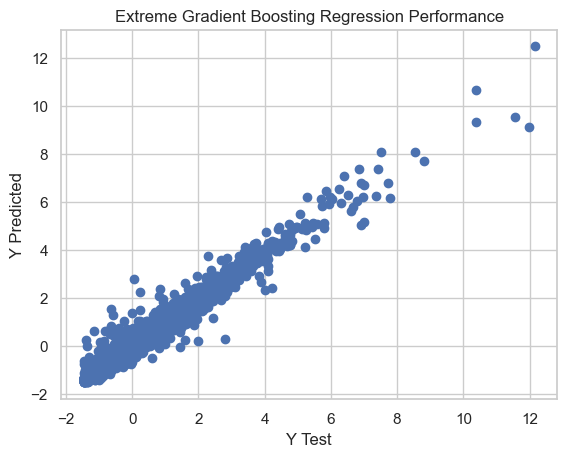

In [214]:
plt.scatter(x = y_test , y = gradboost_pred)
plt.title('Extreme Gradient Boosting Regression Performance')
plt.xlabel('Y Test')
plt.ylabel('Y Predicted')

Text(0, 0.5, 'Residuals')

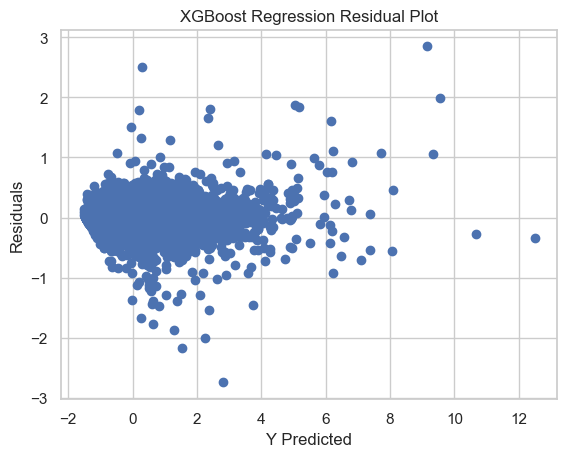

In [215]:
residuals = y_test - gradboost_pred

plt.scatter(x = gradboost_pred , y = residuals)
plt.title('XGBoost Regression Residual Plot')
plt.xlabel('Y Predicted')
plt.ylabel('Residuals')

In [216]:
mets_xgb = [mae(y_test, gradboost_pred), mape(y_test, gradboost_pred), mse(y_test, gradboost_pred), math.sqrt(mse(y_test, gradboost_pred)), r2(y_test, gradboost_pred), aic_xgb, bic_xgb]

### KNN Regression

In [217]:
knn = knnr(n_neighbors = 15, metric = 'euclidean', weights = 'uniform')
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)

In [218]:
print('Mean Absolute Error for k nearest neighbor resourses: ', mae(y_test, knn_pred))
print('Mean Absolute Percentage Error for k nearest neighbor resourses: ', mape(y_test, knn_pred))
print('Mean Squared Error for k nearest neighbor resourses: ', mse(y_test, knn_pred))
print('Root Mean Squared Error for k nearest neighbor resourses: ', math.sqrt(mse(y_test, knn_pred)))
print('R-squared value for k nearest neighbor resourses: ', r2(y_test, knn_pred))

Mean Absolute Error for k nearest neighbor resourses:  0.1853085531103361
Mean Absolute Percentage Error for k nearest neighbor resourses:  1.7865044255413942
Mean Squared Error for k nearest neighbor resourses:  0.07234161266084763
Root Mean Squared Error for k nearest neighbor resourses:  0.2689639616395617
R-squared value for k nearest neighbor resourses:  0.9292374271353496


In [219]:
n = X_train.shape[1]
k = 15

aic_knn = n * np.log(mse(y_test, knn_pred)) + 2 * k
bic_knn = n * np.log(mse(y_test, knn_pred)) + k * np.log(X_train.shape[0])

print("AIC for k nearest neighbors regression:", aic_knn)
print("BIC for k nearest neighbors regression:", bic_knn)

AIC for k nearest neighbors regression: -17.27440367839572
BIC for k nearest neighbors regression: 120.24743569703463


Text(0, 0.5, 'Y Predicted')

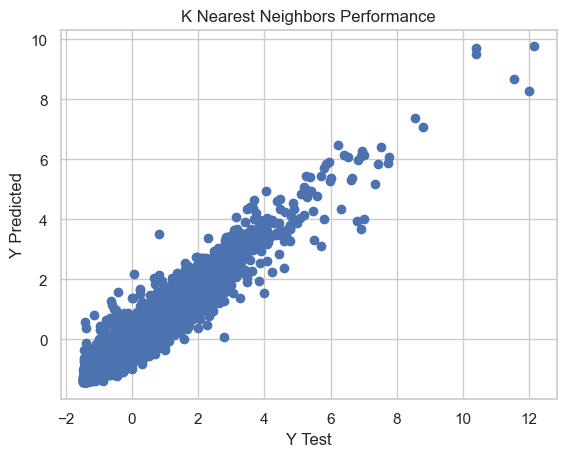

In [220]:
plt.scatter(x = y_test , y = knn_pred)
plt.title('K Nearest Neighbors Performance')
plt.xlabel('Y Test')
plt.ylabel('Y Predicted')

Text(0, 0.5, 'Residuals')

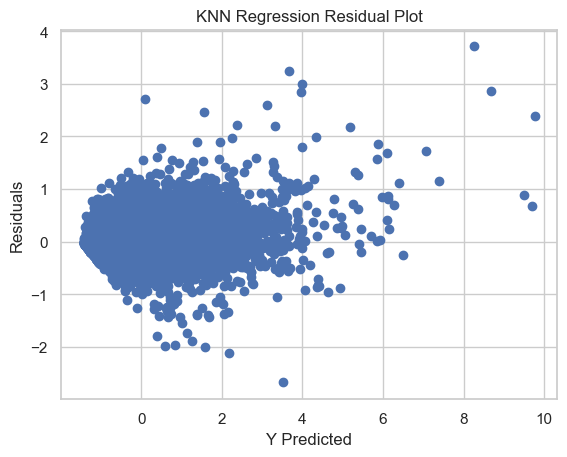

In [221]:
residuals = y_test - knn_pred

plt.scatter(x = knn_pred , y = residuals)
plt.title('KNN Regression Residual Plot')
plt.xlabel('Y Predicted')
plt.ylabel('Residuals')

In [222]:
mets_knn = [mae(y_test, knn_pred), mape(y_test, knn_pred), mse(y_test, knn_pred), math.sqrt(mse(y_test, knn_pred)), r2(y_test, knn_pred), aic_knn, bic_knn]

### Results

In [223]:
evaluation_metrics = {'Linear Regression' : mets_lr,
                      'Ridge Regression' : mets_rr,
                      'Lasso Regression' : mets_lar,
                      'Elastic Net Regression' : mets_er,
                      'Random Forests Regression' : mets_rf,
                      'Extreme Gradient Boosting  Regression' : mets_xgb,
                      'K Nearest Neighbors Regression' : mets_knn}

In [224]:
metrics_fat = pd.DataFrame(evaluation_metrics, index=['MAE', 'MAPE', 'MSE', 'RMSE', 'R2', 'AIC', 'BIC'])

metrics_fat

,Linear Regression,Ridge Regression,Lasso Regression,Elastic Net Regression,Random Forests Regression,Extreme Gradient Boosting Regression,K Nearest Neighbors Regression
MAE,0.110430,0.110432,0.130922,0.130922,0.100136,0.095321,0.185309
MAPE,1.041501,1.041588,0.975804,0.975804,0.902392,0.836439,1.786504
MSE,0.027827,0.027828,0.035635,0.035635,0.024097,0.022365,0.072342
RMSE,0.166815,0.166816,0.188772,0.188772,0.155231,0.149550,0.268964
R2,0.972780,0.972780,0.965143,0.965143,0.976429,0.978123,0.929237
AIC,-64.471249,-62.023526,-59.892506,-58.238700,764.137669,4431.595634,-17.274404
BIC,136.554959,-50.803830,-59.308919,-50.073960,4574.409432,25059.871540,120.247436


In [225]:
min_values = metrics_fat.idxmin(axis=1)

lowest_values = metrics_fat.min(axis=1)

result_df_fat = pd.DataFrame({'Lowest_Model': min_values, 'Lowest_Value': lowest_values})

result_df_fat

,Lowest_Model,Lowest_Value
MAE,Extreme Gradient Boosting Regression,0.095321
MAPE,Extreme Gradient Boosting Regression,0.836439
MSE,Extreme Gradient Boosting Regression,0.022365
RMSE,Extreme Gradient Boosting Regression,0.149550
R2,K Nearest Neighbors Regression,0.929237
AIC,Linear Regression,-64.471249
BIC,Lasso Regression,-59.308919


### Data using ANOVA only

In [226]:
# Dataset after feature engineering before outlier removal
cp_fe.head(5)

,year,make,model,trim,body,transmission,state,condition,odometer,color,interior,seller,mmr,sellingprice,saleyear,salemonth,Car_age,Milesperyear,outlier
2,2014,2,2,81,15,0,2,45.0,1331.0,7,1,2317,31900.0,30000.0,2015.0,1.0,1.0,1331.0,1
21,2014,2,4,120,15,0,2,29.0,25969.0,1,1,2317,34200.0,30000.0,2015.0,2.0,1.0,25969.0,1
24,2014,2,5,138,0,0,2,38.0,10736.0,1,1,6117,67000.0,65000.0,2015.0,1.0,1.0,10736.0,-1
31,2014,1,4,44,14,0,2,42.0,9606.0,18,1,382,48600.0,47500.0,2015.0,1.0,1.0,9606.0,1
37,2014,2,2,81,15,0,2,5.0,111.0,1,15,2317,32200.0,30500.0,2015.0,1.0,1.0,111.0,1


In [227]:
cp_fe.shape

(94449, 19)

In [228]:
# Remove high correlated features, outlier, and target
cp_feat = cp_fe.drop(columns=['Car_age', 'sellingprice', 'outlier'])

print('Dimension of dataset after removing high correlated features :', cp_feat.shape)

Dimension of dataset after removing high correlated features : (94449, 16)


In [229]:
# Scaling
cp_feat_s = scl.fit_transform(cp_feat)
cp_feat_s.shape

(94449, 16)

In [230]:
# Transform them back into a DataFrame
cp_feat_s_df = pd.DataFrame(cp_feat_s, columns=cp_feat.columns)
cp_feat_s_df.head(5)

,year,make,model,trim,body,transmission,state,condition,odometer,color,interior,seller,mmr,saleyear,salemonth,Milesperyear
0,1.180166,-0.984943,-1.156394,-1.383190,0.577622,-0.185167,-1.115412,1.080757,-1.323581,-0.330405,-0.682609,-0.567225,1.252498,0.274097,-0.857059,-1.678986
1,1.180166,-0.984943,-1.042235,-0.992806,0.577622,-0.185167,-1.115412,-0.162838,-0.867573,-1.201768,-0.682609,-0.567225,1.451727,0.274097,-0.519301,1.405122
2,1.180166,-0.984943,-0.985155,-0.812629,-2.101778,-0.185167,-1.115412,0.536684,-1.149510,-1.201768,-0.682609,1.374744,4.292893,0.274097,-0.857059,-0.501697
3,1.180166,-1.110033,-1.042235,-1.753554,0.398995,-0.185167,-1.115412,0.847583,-1.170425,1.267094,-0.682609,-1.556097,2.699068,0.274097,-0.857059,-0.643147
4,1.180166,-0.984943,-1.156394,-1.383190,0.577622,-0.185167,-1.115412,-2.028229,-1.346161,-1.201768,2.492323,-0.567225,1.278485,0.274097,-0.857059,-1.831702


In [231]:
# Differentiate features continuous and features categorical
X_cat = cp_feat_s_df.drop(columns=['odometer','mmr', 'Milesperyear'])
X_cont = cp_feat_s_df[['odometer','mmr', 'Milesperyear']]
y = cp_fe[['sellingprice']]
y['sellingprice'] = y['sellingprice'].astype(int)
y = np.ravel(y)


print('Dimension of categorical features :', X_cat.shape)
print('Dimension of continuous features :', X_cont.shape)
print('Dimension of target :', y.shape)

Dimension of categorical features : (94449, 13)
Dimension of continuous features : (94449, 3)
Dimension of target : (94449,)


In [232]:
# Feature Selection with ANOVA
# Continuous Features
# Calculate F, p, and MI values
f1,p1 = f_regression(X_cont, y)  ### is indicator of linear relationships
mi1 = mutual_info_regression(X_cont.values, y) ### is indicator of non-linear relationships
mi1 /= np.max(mi1)
f1 /= np.max(f1)

In [233]:
# Set threshold for F values
f_threshold = 0.8

# Set threshold for p values
p_threshold = 0.01

# Set threshold for MI values
mi_threshold = 0.8

In [234]:
# Create mask for feature selection with F and MI values
mask_feasel_cont = ((f1 > f_threshold) & (p1 > p_threshold) | (mi1 > mi_threshold))

# Show the number of significant features
num_sel_feat_cont = (mask_feasel_cont == True).sum()
print('Number of selected continuous features:', num_sel_feat_cont)

# Show 5 selected features
sel_feat_cont = X_cont.columns[mask_feasel_cont].tolist()
print('Selected features:', sel_feat_cont)

Number of selected continuous features: 1
Selected features: ['mmr']


In [235]:
# Categorical Features
# Calculate F, p, and MI values
f2,p2 = f_classif(X_cat, y)  ### is indicator of linear relationships
mi2 = mutual_info_regression(X_cat.values, y) ### is indicator of non-linear relationships
mi2 /= np.max(mi2)
f2 /= np.max(f2)

In [236]:
# Set threshold for F values
f2_threshold = 0.05

# Set threshold for p values
p2_threshold = 0.01

# Set threshold for MI values
mi2_threshold = 0.45

In [237]:
# Create mask for feature selection with F and MI values
mask_feasel_cat = ((f2 > f2_threshold) & (p2 > p2_threshold) | (mi2 > mi2_threshold))

# Show the number of significant features
num_sel_feat_cat = (mask_feasel_cat == True).sum()
print('Number of selected categorical features:', num_sel_feat_cat)

# Show the selected features
sel_feat_cat = X_cat.columns[mask_feasel_cat].tolist()
print('Selected features:', sel_feat_cat)

Number of selected categorical features: 6
Selected features: ['year', 'make', 'model', 'trim', 'condition', 'seller']


In [238]:
cp_feat_s_df.head(5)

,year,make,model,trim,body,transmission,state,condition,odometer,color,interior,seller,mmr,saleyear,salemonth,Milesperyear
0,1.180166,-0.984943,-1.156394,-1.383190,0.577622,-0.185167,-1.115412,1.080757,-1.323581,-0.330405,-0.682609,-0.567225,1.252498,0.274097,-0.857059,-1.678986
1,1.180166,-0.984943,-1.042235,-0.992806,0.577622,-0.185167,-1.115412,-0.162838,-0.867573,-1.201768,-0.682609,-0.567225,1.451727,0.274097,-0.519301,1.405122
2,1.180166,-0.984943,-0.985155,-0.812629,-2.101778,-0.185167,-1.115412,0.536684,-1.149510,-1.201768,-0.682609,1.374744,4.292893,0.274097,-0.857059,-0.501697
3,1.180166,-1.110033,-1.042235,-1.753554,0.398995,-0.185167,-1.115412,0.847583,-1.170425,1.267094,-0.682609,-1.556097,2.699068,0.274097,-0.857059,-0.643147
4,1.180166,-0.984943,-1.156394,-1.383190,0.577622,-0.185167,-1.115412,-2.028229,-1.346161,-1.201768,2.492323,-0.567225,1.278485,0.274097,-0.857059,-1.831702


In [239]:
# Selected Features
X = cp_feat_s_df[cp_feat_s_df.columns[cp_feat_s_df.columns.isin(sel_feat_cat)]]

# Add column 'mmr' as numerical feature
X['mmr'] = cp_feat_s_df['mmr']

X.head(5)

,year,make,model,trim,condition,seller,mmr
0,1.180166,-0.984943,-1.156394,-1.383190,1.080757,-0.567225,1.252498
1,1.180166,-0.984943,-1.042235,-0.992806,-0.162838,-0.567225,1.451727
2,1.180166,-0.984943,-0.985155,-0.812629,0.536684,1.374744,4.292893
3,1.180166,-1.110033,-1.042235,-1.753554,0.847583,-1.556097,2.699068
4,1.180166,-0.984943,-1.156394,-1.383190,-2.028229,-0.567225,1.278485


In [240]:
# Train-test split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

print('Dimension of X_train:', X_train.shape)
print('Dimension of y_train:', y_train.shape)
print('Dimension of X_test:', X_test.shape)
print('Dimension of y_test:', y_test.shape)

Dimension of X_train: (70836, 7)
Dimension of y_train: (70836,)
Dimension of X_test: (23613, 7)
Dimension of y_test: (23613,)


### Linear Regression

In [241]:
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)

In [242]:
print('Mean Absolute Error for linear regression: ', mae(y_test, lr_pred))
print('Mean Absolute Persentage Error for linear regression: ', mape(y_test, lr_pred))
print('Mean Squared Error for linear regression: ', mse(y_test, lr_pred))
print('Root Mean Squared Error for linear regression: ', math.sqrt(mse(y_test, lr_pred)))
print('R-squared value for linear regression: ', r2(y_test, lr_pred))

Mean Absolute Error for linear regression:  1291.7076352053814
Mean Absolute Persentage Error for linear regression:  0.14197919985923832
Mean Squared Error for linear regression:  3826081.1161414357
Root Mean Squared Error for linear regression:  1956.037094776435
R-squared value for linear regression:  0.9724788541732592


In [243]:
n = X_train.shape[1]

aic_lr = n * np.log(mse(y_test, lr_pred))
bic_lr = n * np.log(mse(y_test, lr_pred)) + n * np.log(X_train.shape[0])

print("AIC for linear regression:", aic_lr)
print("BIC for linear regression:", bic_lr)

AIC for linear regression: 106.10146141034392
BIC for linear regression: 184.27831978554474


Text(0, 0.5, 'Y Predicted')

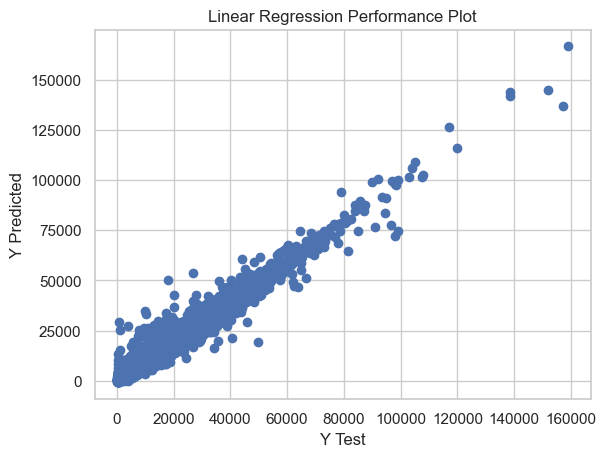

In [244]:
plt.scatter(x = y_test , y = lr_pred)
plt.title('Linear Regression Performance Plot')
plt.xlabel('Y Test')
plt.ylabel('Y Predicted')

Text(0, 0.5, 'Residuals')

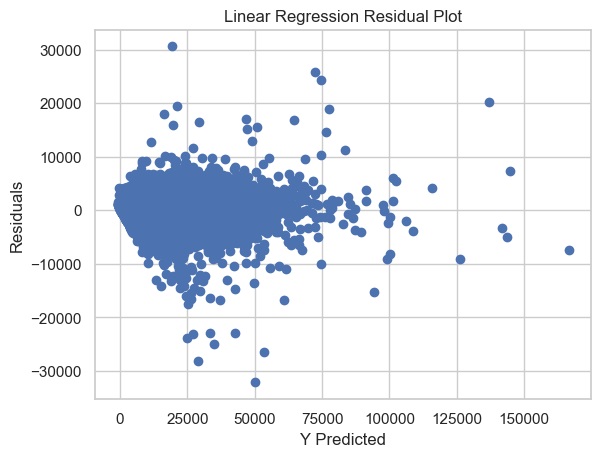

In [245]:
residuals = y_test - lr_pred

plt.scatter(x = lr_pred , y = residuals)
plt.title('Linear Regression Residual Plot')
plt.xlabel('Y Predicted')
plt.ylabel('Residuals')

In [246]:
mets_lr = [mae(y_test, lr_pred), mape(y_test, lr_pred), mse(y_test, lr_pred), math.sqrt(mse(y_test, lr_pred)), r2(y_test, lr_pred), aic_lr, bic_lr]

### Ridge Regression

In [247]:
rr = Ridge(alpha = 1.3, random_state = 36)
rr.fit(X_train, y_train)
rr_pred = rr.predict(X_test)

In [248]:
print('Mean Absolute Error for ridge regression: ', mae(y_test, rr_pred))
print('Mean Absolute Persentage Error for ridge regression: ', mape(y_test, rr_pred))
print('Mean Squared Error for ridge regression: ', mse(y_test, rr_pred))
print('Root Mean Squared Error for ridge regression: ', math.sqrt(mse(y_test, rr_pred)))
print('R-squared value for ridge regression: ', r2(y_test, rr_pred))

Mean Absolute Error for ridge regression:  1291.7127648020162
Mean Absolute Persentage Error for ridge regression:  0.1419818343011755
Mean Squared Error for ridge regression:  3826094.119442081
Root Mean Squared Error for ridge regression:  1956.0404186626822
R-squared value for ridge regression:  0.972478760640027


In [249]:
n = X_train.shape[1]
alpha = 1.3

aic_rr = n * np.log(mse(y_test, rr_pred)) + 2 * alpha * np.sum(rr.coef_ ** 2)
bic_rr = n * np.log(mse(y_test, rr_pred)) + alpha * np.sum(rr.coef_ ** 2) * np.log(X_train.shape[0])

print("AIC for ridge regression:", aic_rr)
print("BIC for ridge regression:", bic_rr)

AIC for ridge regression: 337723638.4666661
BIC for ridge regression: 1885869017.5075784


Text(0, 0.5, 'Y Predicted')

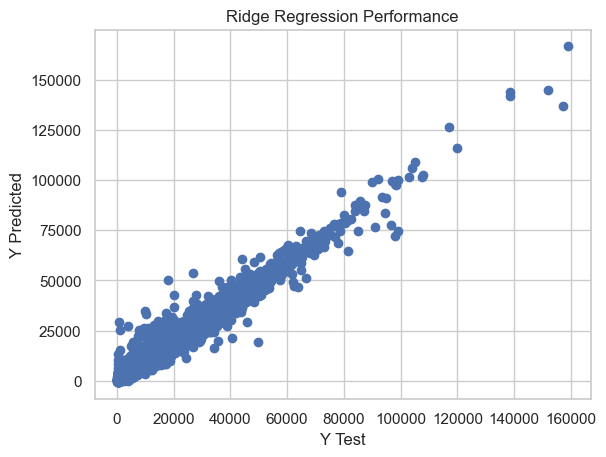

In [250]:
plt.scatter(x = y_test , y = rr_pred)
plt.title('Ridge Regression Performance')
plt.xlabel('Y Test')
plt.ylabel('Y Predicted')

Text(0, 0.5, 'Residuals')

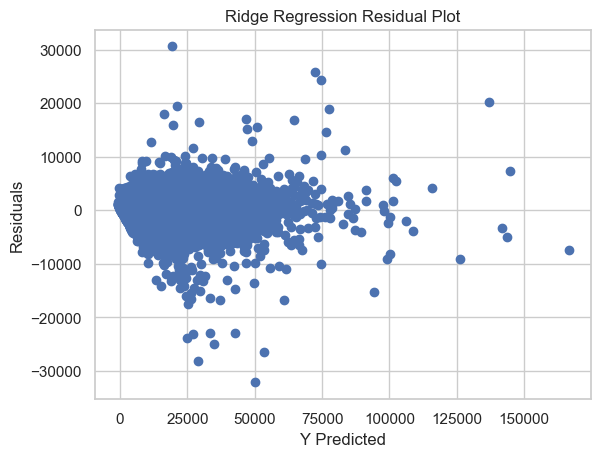

In [251]:
residuals = y_test - rr_pred

plt.scatter(x = rr_pred , y = residuals)
plt.title('Ridge Regression Residual Plot')
plt.xlabel('Y Predicted')
plt.ylabel('Residuals')

In [252]:
mets_rr = [mae(y_test, rr_pred), mape(y_test, rr_pred), mse(y_test, rr_pred), math.sqrt(mse(y_test, rr_pred)), r2(y_test, rr_pred), aic_rr, bic_rr]

### Lasso Regression

In [253]:
lar = Lasso(alpha = 0.07, selection = 'random', random_state = 36)
lar.fit(X_train, y_train)
lar_pred = lar.predict(X_test)

In [254]:
print('Mean Absolute Error for lasso regression: ', mae(y_test, lar_pred))
print('Mean Absolute Persentage Error for lasso regression: ', mape(y_test, lar_pred))
print('Mean Squared Error for lasso regression: ', mse(y_test, lar_pred))
print('Root Mean Squared Error for lasso regression: ', math.sqrt(mse(y_test, lar_pred)))
print('R-squared value for lasso regression: ', r2(y_test, lar_pred))

Mean Absolute Error for lasso regression:  1291.7046209136886
Mean Absolute Persentage Error for lasso regression:  0.14197952662337496
Mean Squared Error for lasso regression:  3826076.897215259
Root Mean Squared Error for lasso regression:  1956.036016338978
R-squared value for lasso regression:  0.9724788845201543


In [255]:
n = X_train.shape[1]
alpha = 0.07

aic_lar = n * np.log(mse(y_test, lar_pred)) + 2 * alpha * np.sum(np.abs(lar.coef_))
bic_lar = n * np.log(mse(y_test, lar_pred)) + alpha * np.sum(np.abs(lar.coef_)) * np.log(X_train.shape[0])

print("AIC for lasso regression:", aic_lar)
print("BIC for lasso regression:", bic_lar)

AIC for lasso regression: 1804.0436088979047
BIC for lasso regression: 9587.514553466304


Text(0, 0.5, 'Y Predicted')

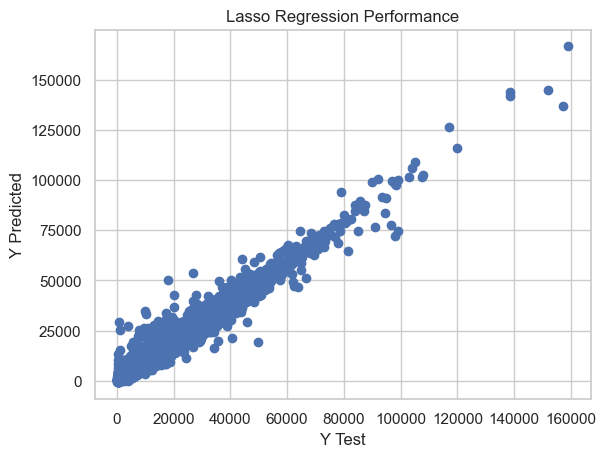

In [256]:
plt.scatter(x = y_test , y = lar_pred)
plt.title('Lasso Regression Performance')
plt.xlabel('Y Test')
plt.ylabel('Y Predicted')

Text(0, 0.5, 'Residuals')

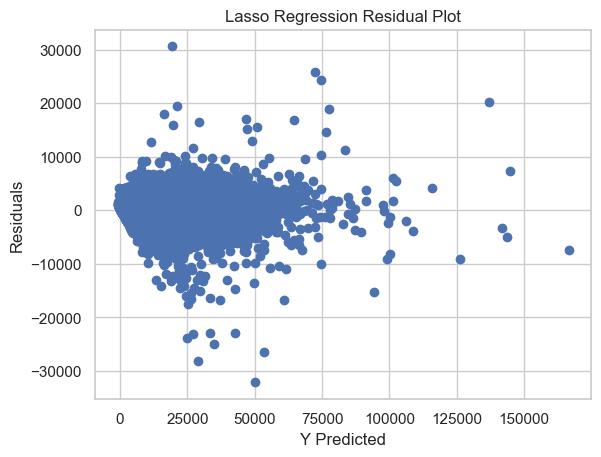

In [257]:
residuals = y_test - lar_pred

plt.scatter(x = lar_pred , y = residuals)
plt.title('Lasso Regression Residual Plot')
plt.xlabel('Y Predicted')
plt.ylabel('Residuals')

In [258]:
mets_lar = [mae(y_test, lar_pred), mape(y_test, lar_pred), mse(y_test, lar_pred), math.sqrt(mse(y_test, lar_pred)), r2(y_test, lar_pred), aic_lar, bic_lar]

### Elastic Net Regression

In [259]:
er = ElasticNet(alpha = 0.07, l1_ratio = 1, selection = 'random', random_state = 36)
er.fit(X_train, y_train)
er_pred = er.predict(X_test)

In [260]:
print('Mean Absolute Error for elastic net regression: ', mae(y_test, er_pred))
print('Mean Absolute Persentage Error for elastic net regression: ', mape(y_test, er_pred))
print('Mean Squared Error for elastic net regression: ', mse(y_test, er_pred))
print('Root Mean Squared Error for elastic net regression: ', math.sqrt(mse(y_test, er_pred)))
print('R-squared value for elastic net regression: ', r2(y_test, er_pred))

Mean Absolute Error for elastic net regression:  1291.7046209136886
Mean Absolute Persentage Error for elastic net regression:  0.14197952662337496
Mean Squared Error for elastic net regression:  3826076.897215259
Root Mean Squared Error for elastic net regression:  1956.036016338978
R-squared value for elastic net regression:  0.9724788845201543


In [261]:
n = X_train.shape[1]
alpha = 0.07
l1_ratio = 1

aic_er = n * np.log(mse(y_test, er_pred)) + 2 * (alpha * np.sum(np.abs(er.coef_)) + l1_ratio * np.sum(er.coef_ ** 2))
bic_er = n * np.log(mse(y_test, er_pred)) + (alpha * np.sum(np.abs(er.coef_)) + l1_ratio * np.sum(er.coef_ ** 2)) * np.log(X_train.shape[0])

print("AIC for elastic net regression:", aic_er)
print("BIC for elastic net regression:", bic_er)

AIC for elastic net regression: 259799913.65913785
BIC for elastic net regression: 1450738160.4829898


Text(0, 0.5, 'Y Predicted')

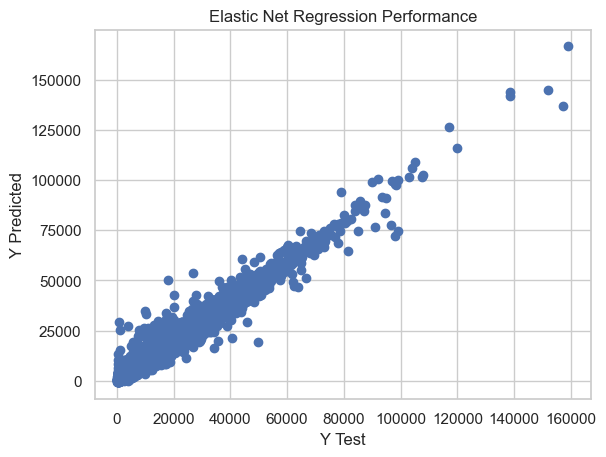

In [262]:
plt.scatter(x = y_test , y = er_pred)
plt.title('Elastic Net Regression Performance')
plt.xlabel('Y Test')
plt.ylabel('Y Predicted')

Text(0, 0.5, 'Residuals')

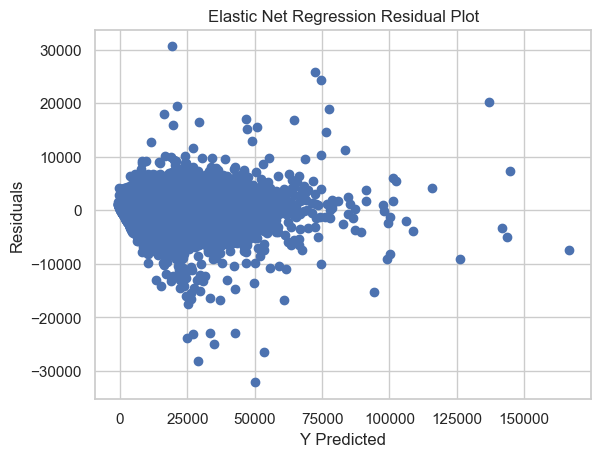

In [263]:
residuals = y_test - er_pred

plt.scatter(x = er_pred , y = residuals)
plt.title('Elastic Net Regression Residual Plot')
plt.xlabel('Y Predicted')
plt.ylabel('Residuals')

In [264]:
mets_er = [mae(y_test, er_pred), mape(y_test, er_pred), mse(y_test, er_pred), math.sqrt(mse(y_test, er_pred)), r2(y_test, er_pred), aic_er, bic_er]

### Random Forests Regressor

In [265]:
rf = rfr(max_depth = 15, max_features = 0.6, max_samples = 0.7, random_state=42, n_estimators=400)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

In [266]:
print('Mean Absolute Error for random forest regression: ', mae(y_test, rf_pred))
print('Mean Absolute Persentage Error for random forest regression: ', mape(y_test, rf_pred))
print('Mean Squared Error for random forest regression: ', mse(y_test, rf_pred))
print('Root Mean Squared Error for random forest regression: ', math.sqrt(mse(y_test, rf_pred)))
print('R-squared value for random forest regression: ', r2(y_test, rf_pred))

Mean Absolute Error for random forest regression:  1199.5834221973857
Mean Absolute Persentage Error for random forest regression:  0.1323414157337223
Mean Squared Error for random forest regression:  3544671.417494187
Root Mean Squared Error for random forest regression:  1882.7297781397592
R-squared value for random forest regression:  0.9745030447532385


In [267]:
n = X_train.shape[1] 
max_depth = 15
max_features = 0.6
n_estimators = 400

aic_rf = n * np.log(mse(y_test, rf_pred)) + 2 * (max_depth + max_features + n_estimators)
bic_rf = n * np.log(mse(y_test, rf_pred)) + (max_depth + max_features + n_estimators) * np.log(X_train.shape[0])

print("AIC for random forests regression:", aic_rf)
print("BIC for random forests regression:", bic_rf)

AIC for random forests regression: 936.7666921725657
BIC for random forests regression: 4747.03845513449


Text(0, 0.5, 'Y Predicted')

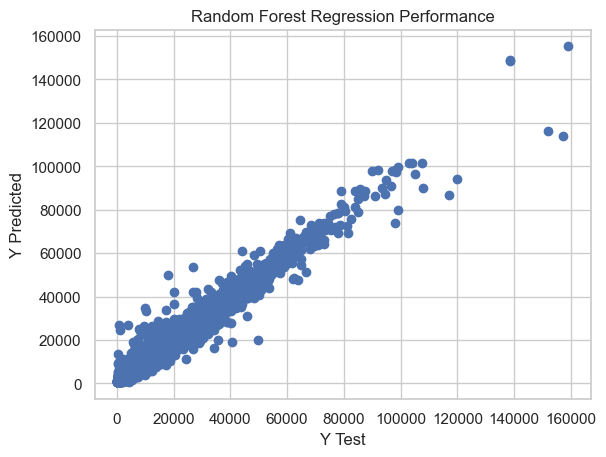

In [268]:
plt.scatter(x = y_test , y = rf_pred)
plt.title('Random Forest Regression Performance')
plt.xlabel('Y Test')
plt.ylabel('Y Predicted')

Text(0, 0.5, 'Residuals')

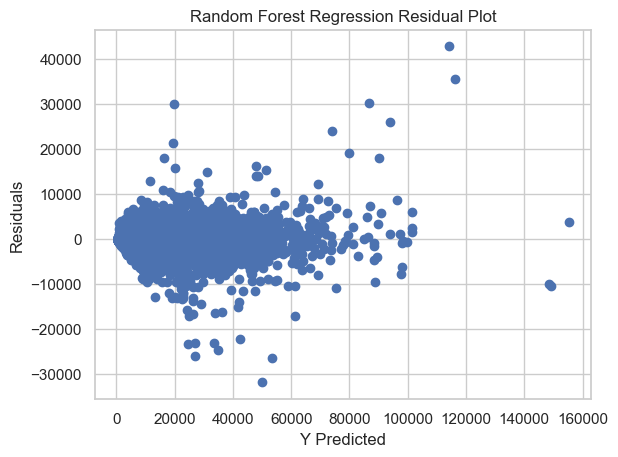

In [269]:
residuals = y_test - rf_pred


plt.scatter(x = rf_pred , y = residuals)
plt.title('Random Forest Regression Residual Plot')
plt.xlabel('Y Predicted')
plt.ylabel('Residuals')

In [270]:
mets_rf = [mae(y_test, rf_pred), mape(y_test, rf_pred), mse(y_test, rf_pred), math.sqrt(mse(y_test, rf_pred)), r2(y_test, rf_pred), aic_rf, bic_rf]

### XGBoost Regression

In [271]:
gradboost = xgb(n_estimators = 375, learning_rate = 0.2, max_depth = 6, max_features = 0.9, subsample = 0.8, n_iter_no_change=20, loss='huber')
gradboost.fit(X_train, y_train)
gradboost_pred = gradboost.predict(X_test)

In [272]:
print('Mean Absolute Error for extreme gradient boosting: ', mae(y_test, gradboost_pred))
print('Mean Absolute Persentage Error for extreme gradient boosting: ', mape(y_test, gradboost_pred))
print('Mean Squared Error for extreme gradient boosting: ', mse(y_test, gradboost_pred))
print('Root Mean Squared Error for extreme gradient boosting: ', math.sqrt(mse(y_test, gradboost_pred)))
print('R-squared value for extreme gradient boosting: ', r2(y_test, gradboost_pred))

Mean Absolute Error for extreme gradient boosting:  1157.8676917407258
Mean Absolute Persentage Error for extreme gradient boosting:  0.12571714386048335
Mean Squared Error for extreme gradient boosting:  3353070.8256457574
Root Mean Squared Error for extreme gradient boosting:  1831.1392152552894
R-squared value for extreme gradient boosting:  0.9758812350395093


In [273]:
n = X_train.shape[1]
n_estimators = 375
max_depth = 6

aic_xgb = n * np.log(mse(y_test, gradboost_pred)) + 2 * (n_estimators * max_depth)
bic_xgb = n * np.log(mse(y_test, gradboost_pred)) + (n_estimators * max_depth) * np.log(X_train.shape[0])

print("AIC for gradient boosting regression:", aic_xgb)
print("BIC for gradient boosting regression:", bic_xgb)

AIC for gradient boosting regression: 4605.1777100380505
BIC for gradient boosting regression: 25233.453616352603


Text(0, 0.5, 'Y Predicted')

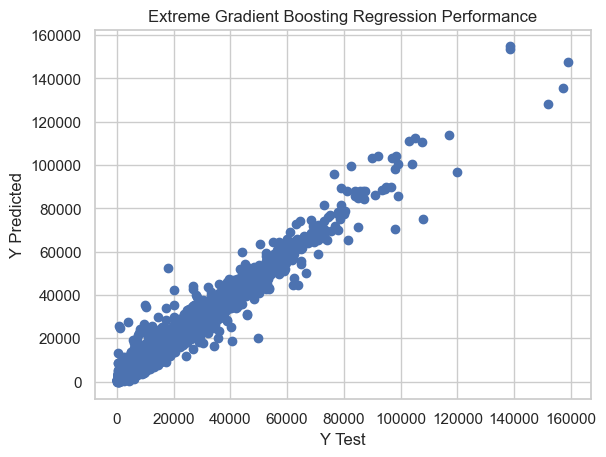

In [274]:
plt.scatter(x = y_test , y = gradboost_pred)
plt.title('Extreme Gradient Boosting Regression Performance')
plt.xlabel('Y Test')
plt.ylabel('Y Predicted')

Text(0, 0.5, 'Residuals')

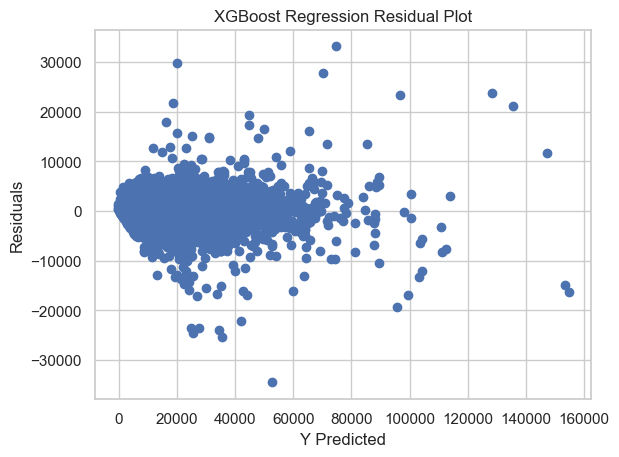

In [275]:
residuals = y_test - gradboost_pred

plt.scatter(x = gradboost_pred , y = residuals)
plt.title('XGBoost Regression Residual Plot')
plt.xlabel('Y Predicted')
plt.ylabel('Residuals')

In [276]:
mets_xgb = [mae(y_test, gradboost_pred), mape(y_test, gradboost_pred), mse(y_test, gradboost_pred), math.sqrt(mse(y_test, gradboost_pred)), r2(y_test, gradboost_pred), aic_xgb, bic_xgb]

### KNN Regression

In [277]:
knn = knnr(n_neighbors = 15, metric = 'euclidean', weights = 'uniform')
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)

In [278]:
print('Mean Absolute Error for k nearest neighbor resourses: ', mae(y_test, knn_pred))
print('Mean Absolute Percentage Error for k nearest neighbor resourses: ', mape(y_test, knn_pred))
print('Mean Squared Error for k nearest neighbor resourses: ', mse(y_test, knn_pred))
print('Root Mean Squared Error for k nearest neighbor resourses: ', math.sqrt(mse(y_test, knn_pred)))
print('R-squared value for k nearest neighbor resourses: ', r2(y_test, knn_pred))

Mean Absolute Error for k nearest neighbor resourses:  1505.720507065317
Mean Absolute Percentage Error for k nearest neighbor resourses:  0.1819655545131562
Mean Squared Error for k nearest neighbor resourses:  5047245.963273527
Root Mean Squared Error for k nearest neighbor resourses:  2246.607656729035
R-squared value for k nearest neighbor resourses:  0.9636949693531942


In [279]:
n = X_train.shape[1]
k = 15

aic_knn = n * np.log(mse(y_test, knn_pred)) + 2 * k
bic_knn = n * np.log(mse(y_test, knn_pred)) + k * np.log(X_train.shape[0])

print("AIC for k nearest neighbors regression:", aic_knn)
print("BIC for k nearest neighbors regression:", bic_knn)

AIC for k nearest neighbors regression: 138.0404730907939
BIC for k nearest neighbors regression: 275.5623124662243


Text(0, 0.5, 'Y Predicted')

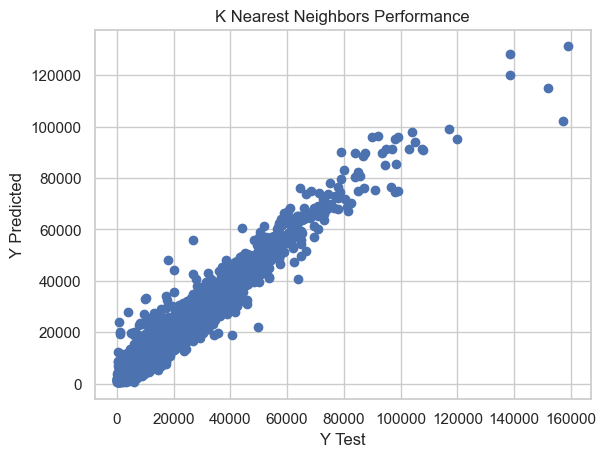

In [280]:
plt.scatter(x = y_test , y = knn_pred)
plt.title('K Nearest Neighbors Performance')
plt.xlabel('Y Test')
plt.ylabel('Y Predicted')

Text(0, 0.5, 'Residuals')

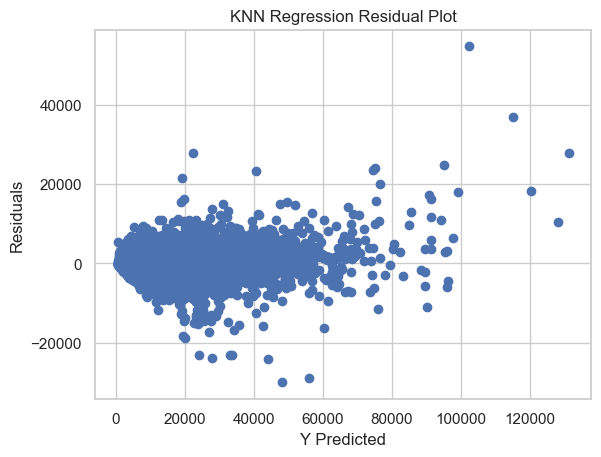

In [281]:
residuals = y_test - knn_pred

plt.scatter(x = knn_pred , y = residuals)
plt.title('KNN Regression Residual Plot')
plt.xlabel('Y Predicted')
plt.ylabel('Residuals')

In [282]:
mets_knn = [mae(y_test, knn_pred), mape(y_test, knn_pred), mse(y_test, knn_pred), math.sqrt(mse(y_test, knn_pred)), r2(y_test, knn_pred), aic_knn, bic_knn]

### Results

In [283]:
evaluation_metrics = {'Linear Regression' : mets_lr,
                      'Ridge Regression' : mets_rr,
                      'Lasso Regression' : mets_lar,
                      'Elastic Net Regression' : mets_er,
                      'Random Forests Regression' : mets_rf,
                      'Extreme Gradient Boosting  Regression' : mets_xgb,
                      'K Nearest Neighbors Regression' : mets_knn}

In [284]:
metrics_fat = pd.DataFrame(evaluation_metrics, index=['MAE', 'MAPE', 'MSE', 'RMSE', 'R2', 'AIC', 'BIC'])

metrics_fat

,Linear Regression,Ridge Regression,Lasso Regression,Elastic Net Regression,Random Forests Regression,Extreme Gradient Boosting Regression,K Nearest Neighbors Regression
MAE,1.291708e+03,1.291713e+03,1.291705e+03,1.291705e+03,1.199583e+03,1.157868e+03,1.505721e+03
MAPE,1.419792e-01,1.419818e-01,1.419795e-01,1.419795e-01,1.323414e-01,1.257171e-01,1.819656e-01
MSE,3.826081e+06,3.826094e+06,3.826077e+06,3.826077e+06,3.544671e+06,3.353071e+06,5.047246e+06
RMSE,1.956037e+03,1.956040e+03,1.956036e+03,1.956036e+03,1.882730e+03,1.831139e+03,2.246608e+03
R2,9.724789e-01,9.724788e-01,9.724789e-01,9.724789e-01,9.745030e-01,9.758812e-01,9.636950e-01
AIC,1.061015e+02,3.377236e+08,1.804044e+03,2.597999e+08,9.367667e+02,4.605178e+03,1.380405e+02
BIC,1.842783e+02,1.885869e+09,9.587515e+03,1.450738e+09,4.747038e+03,2.523345e+04,2.755623e+02


In [285]:
min_values = metrics_fat.idxmin(axis=1)

lowest_values = metrics_fat.min(axis=1)

result_df_fat = pd.DataFrame({'Lowest_Model': min_values, 'Lowest_Value': lowest_values})

result_df_fat

,Lowest_Model,Lowest_Value
MAE,Extreme Gradient Boosting Regression,1.157868e+03
MAPE,Extreme Gradient Boosting Regression,1.257171e-01
MSE,Extreme Gradient Boosting Regression,3.353071e+06
RMSE,Extreme Gradient Boosting Regression,1.831139e+03
R2,K Nearest Neighbors Regression,9.636950e-01
AIC,Linear Regression,1.061015e+02
BIC,Linear Regression,1.842783e+02
